# Modelo de Clasificación de perfiles de riesgo frente al juego

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
df_origen = pd.read_excel('data/juego.xlsx')
df_origen.columns = df_origen.iloc[0]
df_origen = df_origen[1:]
df_origen

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,POf3_2,POF4,P1P1A,P1P1B,P1P1C,P1P1D,P1P1E,P1P1F,P1P1G,P1P1H,P1P1I,P1P1J,P1P1K,P1P1L,P1P1M,P1P1N,P1P1O,P2P2A,P2P2B,P2P2C,P2P2D,P2P2E,P2P2F,P2P2G,P2P2H,P2P2I,P2P2J,P2P2K,P2P2L,P2P2M,P2P2N,P2P2O,P3,P3B,P4,P5,P6,P7,P8,P9,p10_1,p10_2,p10_2_A,p10r1,P10R2,P10R3,P10R4,P10R5,P10R6,P10R7,P10R8,P10R10,P10R11,P10R12,P10R12Otros_B,P11,P11B,P12A_1,P12A_2,P12A_3,P12B_1,P12B_2,P12B_3,P13,P14A1,P14B1,P14A2,P14B2,P14A3,P14B3,P14A4,P14B4,P14A5,P14B5,P14A6,P14B6,P14A7,P14B7,P14A8,P14B8,P14A9,P14B9,P14A10,P14B10,P14A11,P14B11,P14A12,P14B12,P14A13,P14B13,P14A14,P14B14,P14A15,P14B15,P14A16,P14B16,P14A17,P14B17,P15A,P15B,P15B1_1,P15B1_2,P15B1_3,P15B1R1,P15B1R2,P15B1R3,P15B1R4,P15B1R5,P15B1R6,P15B1R7,P15B1R8,P15B1R9,P15B1R10,P15B1R11,P15B1R12,P15B1R13,P15B1R14,P15B1R15,P15B1R16,P15B1R17,P15B1R18,P16A,P16B,P16C,P16D,V16D_2,P17P17A,P17P17B,P17P17C,P17P17D,P17P17E,P17P17F,P17P17G,P17P17H,P17P17I,P18A,P18B,P18C,P19_1,P19_2,P19_3,P19R1,P19R2,P19R3,P19R4,P19R5,P19R6,P19R7,P19R8,P19R9,P19R10,P19R11,P19R12,P19R13,P19R14,P19R15,P19R16,P19R17,P19R18,P20,P21,P22,P23,P24,P25P25A,P25P25B,P25P25C,P25P25D,P25P25E,P25P25F,P25P25G,P25P25H,P25P25I,P25P25J,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38SP1,P38SP2,P38SP3,P38SP4,P38SP5,P38SP6,P38SP7,P38SP8,P38SP9,P38SP10,P39,P40,P41,P42,P43,P44,P45_1,P45_2,P45_3,P45R1,P45R2,P45R3,P45R4,P45R5,P45R6,P45R7,P46,P47,P48,P50,DB0,DB1,DB2,DB3,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
1,1006,1,9,4,4,32,1,1,1,2,NaN,NaN,2,1,1,1,1,2,1,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,5,2,1,2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,19,1,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,4,3,4,2,3,5,5,9,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,14,15,NaN,NaN,NaN,2,1,2,1,2,3,3,3,3,3,2,4,2,2,3,2,NaN,4,3,1,2,3,3,2,1,2,2,7,2,2,7,7,4,7,7,7,1,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,4,2,NaN,1,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
2,1007,1,3,5,6,52,1,1,1,2,NaN,NaN,2,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,2,5,1,2,2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,30,15,NaN,NaN,NaN,NaN,NaN,99,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,3,4,4,4,3,2,5,3,7,11,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,11,NaN,NaN,NaN,15,NaN,NaN,NaN,2,99,2,1,2,1,5,1,1,1,5,1,1,1,99,2,NaN,3,3,1,2,3,4,3,4,2,2,1,2,1,1,6,1,5,7,7,1,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,3,4,NaN,5,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
3,1008,1,4,5,8,67,2,1,1,2,NaN,NaN,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,2,5,2,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,39,1,NaN,NaN,NaN,NaN,NaN,99,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,5,5,5,2,2,3,4,3,5,7,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,11,NaN,NaN,14,NaN,NaN,NaN,NaN,2,99,2,1,2,3,4,4,4,2,2,2,2,2,4,2,NaN,4,2,1,2,1,5,2,1,2,2,1,4,4,6,7,1,1,1,1,1,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,2,4,NaN,100,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
4,1009,1,5,5,7,60,2,1,1,2,NaN,NaN,5,100,100,100,100,100,100,100,100,100,100,100,100,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,5,2,2,4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,30,2,NaN,NaN,NaN,NaN,NaN,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,N

In [2]:
df_origen.duplicated().sum()

0

In [3]:
df_origen = df_origen.loc[df_origen['POF2'] == 1]
columnas_seleccionadas = ['P0B2', 'P0C', 'POF3', 'P3', 'P4', 'P5', 'P8', 'P20', 'P21', 'P22', 'P23', 'P24', 'P28', 'P29', 'P31', 'P35', 'P46', 'DB0', 'DB1', 'DB5']
df = df_origen[columnas_seleccionadas]
df = df.astype(int)

In [4]:
columnas_relevantes = ['P1P1A', 'P1P1B', 'P1P1C', 'P1P1D', 'P1P1E', 'P1P1F', 'P1P1G', 'P1P1N', 'P1P1O']
moda_por_columna = df_origen[columnas_relevantes].mode().iloc[0]
for columna in columnas_relevantes:
    df_origen[columna] = df_origen[columna].replace({99: moda_por_columna[columna], 100: moda_por_columna[columna]})
df['P1A'] = df_origen[columnas_relevantes].max(axis=1, skipna=True)

moda_p1b = df_origen['P1P1H'].mode().iloc[0]
df['P1B'] = df_origen['P1P1H'].replace({99: moda_p1b, 100: moda_p1b})

columnas_relevantes = ['P1P1J', 'P1P1I', 'P1P1K', 'P1P1L', 'P1P1M']
moda_por_columna = df_origen[columnas_relevantes].mode().iloc[0]
for columna in columnas_relevantes:
    df_origen[columna] = df_origen[columna].replace({99: moda_por_columna[columna], 100: moda_por_columna[columna]})
df['P1C'] = df_origen[columnas_relevantes].max(axis=1, skipna=True)

In [5]:
columnas_relevantes = ['P2P2A', 'P2P2B', 'P2P2C', 'P2P2D', 'P2P2E', 'P2P2F', 'P2P2G', 'P2P2N', 'P2P2O']
moda_por_columna = df_origen[columnas_relevantes].mode().iloc[0]
for columna in columnas_relevantes:
    df_origen[columna] = df_origen[columna].replace({99: moda_por_columna[columna], 100: moda_por_columna[columna]})
df['P2A'] = df_origen[columnas_relevantes].max(axis=1, skipna=True)

moda_p2b = df_origen['P2P2H'].mode().iloc[0]
df['P2B'] = df_origen['P2P2H'].replace({99: moda_p2b, 100: moda_p2b})

columnas_relevantes = ['P2P2J', 'P2P2I', 'P2P2K', 'P2P2L', 'P2P2M']
moda_por_columna = df_origen[columnas_relevantes].mode().iloc[0]
for columna in columnas_relevantes:
    df_origen[columna] = df_origen[columna].replace({99: moda_por_columna[columna], 100: moda_por_columna[columna]})
df['P2C'] = df_origen[columnas_relevantes].max(axis=1, skipna=True)

In [6]:
df['P21'] = df['P21'].replace({2: 3, 99: 2, 100: 2})

In [7]:
for letra in 'ABCDEFGHIJ':
    df[f'P25{letra}'] = df_origen[f'P25P25{letra}'].replace({99: 3, 100: 3})

In [8]:
df_origen['P27'].fillna(2, inplace=True)
df['P27'] = df_origen['P27']

In [9]:
df_origen['P42'].fillna(2, inplace=True)
df['P42'] = df_origen['P42']

In [10]:
df['P22'] = df['P22'].replace({99: 1, 100: 1})

In [11]:
df['P21'] = df['P21'].replace({2: 3, 3: 2, 99: 2, 100: 2})

In [12]:
for columna in df.columns:
    print(df[columna].value_counts())

65    133
35    130
45    116
55    115
54    104
     ... 
88      5
89      3
93      1
91      1
90      1
Name: P0B2, Length: 75, dtype: int64
1    2381
2    2288
Name: P0C, dtype: int64
2    4256
1     413
Name: POF3, dtype: int64
1      3888
2       521
3       105
99       41
4        41
5        37
6        32
100       4
Name: P3, dtype: int64
1      3464
2       768
3       330
4        57
5        27
99       20
100       3
Name: P4, dtype: int64
1      2368
2      1787
3       388
4        81
99       22
5        17
100       6
Name: P5, dtype: int64
1      2942
2      1181
3       429
4        62
5        41
99       12
100       2
Name: P8, dtype: int64
2      3460
1      1128
99       65
100      16
Name: P20, dtype: int64
1    2171
2    2148
3     350
Name: P21, dtype: int64
2    4281
1     388
Name: P22, dtype: int64
1      4323
2       197
3       109
99       35
100       5
Name: P23, dtype: int64
2      4322
1       330
99       16
100       1
Name: P24, dtype: int6

In [13]:
for columna in df.columns:
    moda_columna = df[columna].mode().iloc[0]
    df[columna] = df[columna].apply(lambda x: moda_columna if x in [99, 100] else x)
    if columna == 'P35' :
        df[columna] = df[columna].replace({11: moda_columna, 12: moda_columna})

In [14]:
variables = ['P0B2', 'P0C', 'DB0', 'DB1', 'DB5', 'P28', 'P35', 'P27', 'P31', 'P42', 'P29', 'P46', 'POF3', 'P3', 'P4', 'P5', 'P8', 'P20', 'P21', 'P22', 'P23', 'P24', 'P1A', 'P1B', 'P1C', 'P2A', 'P2B', 'P2C', 'P25A', 'P25B', 'P25C', 'P25D', 'P25E', 'P25F', 'P25G', 'P25H', 'P25I', 'P25J']
df = df.reindex(columns=variables)

In [15]:
df

,P0B2,P0C,DB0,DB1,DB5,P28,P35,P27,P31,P42,P29,P46,POF3,P3,P4,P5,P8,P20,P21,P22,P23,P24,P1A,P1B,P1C,P2A,P2B,P2C,P25A,P25B,P25C,P25D,P25E,P25F,P25G,P25H,P25I,P25J
1,32,1,4,2,2,4,1,2,2,2,3,7,2,1,1,1,1,2,1,2,1,2,2,2,2,1,1,1,3,3,3,3,3,2,4,2,2,3
2,52,1,3,4,1,3,4,2,2,2,3,8,2,1,1,2,2,2,3,2,1,2,5,1,1,1,1,1,1,5,1,1,1,5,1,1,1,3
3,67,2,2,4,4,4,1,2,2,2,2,9,2,1,1,2,1,2,3,2,1,2,2,1,1,1,1,1,3,4,4,4,2,2,2,2,2,4
4,60,2,3,1,2,5,1,2,2,2,2,11,2,1,1,1,2,1,1,2,1,2,5,1,1,1,1,1,3,4,3,3,3,4,3,2,2,4
5,51,2,3,1,2,4,2,2,2,2,2,9,2,1,1,1,1,1,1,2,1,2,4,1,2,1,1,1,1,1,2,3,3,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,47,2,3,1,2,4,2,3,2,2,3,9,2,1,1,2,2,1,2,2,1,2,3,1,1,1,1,1,2,3,4,3,2,3,2,4,4,4
6813,33,2,3,1,1,3,0,2,1,1,1,6,2,1,1,1,1,2,2,2,1,2,5,1,1,1,1,1,1,2,4,4,3,4,1,4,4,3
6814,39,2,2,6,2,5,0,4,2,1,5,9,2,1,1,1,1,2,2,2,1,2,2,1,1,1,1,1,2,1,3,3,4,3,1,2,3,4
6815,57,1,3,1,2,4,5,2,2,2,2,9,2,1,1,2,1,1,2,2,1,2,5,1,1,1,1,1,1,3,4,3,2,2,1,4,3,3


In [16]:
nuevos_nombres_columnas = [
    'edad', 'sexo', 'estudios', 'situac_laboral', 'estado_civil', 'val_salud', 'alcohol', 'fuma', 
    'problema_psico', 'ayuda_ansie', 'impulsivo', 'satisf_vida', 'online', 'horas', 'val_horas', 
    'gasto', 'val_gasto', 'entorno', 'pref_premios', 'planificacion', 'control', 'espera', 
    'frec_loteria', 'frec_slots', 'frec_apuestas', 'online_loteria', 'online_slots', 'online_apuestas', 
    'habilidad', 'probab_repetir', 'aprove_racha', 'persistencia', 'cercania_ganar', 'creencia_suerte', 
    'predic_premios', 'sensa_especial', 'recuperar', 'incentivo'
    ]

df.rename(columns=dict(zip(df.columns, nuevos_nombres_columnas)), inplace=True)

In [17]:
df

,edad,sexo,estudios,situac_laboral,estado_civil,val_salud,alcohol,fuma,problema_psico,ayuda_ansie,impulsivo,satisf_vida,online,horas,val_horas,gasto,val_gasto,entorno,pref_premios,planificacion,control,espera,frec_loteria,frec_slots,frec_apuestas,online_loteria,online_slots,online_apuestas,habilidad,probab_repetir,aprove_racha,persistencia,cercania_ganar,creencia_suerte,predic_premios,sensa_especial,recuperar,incentivo
1,32,1,4,2,2,4,1,2,2,2,3,7,2,1,1,1,1,2,1,2,1,2,2,2,2,1,1,1,3,3,3,3,3,2,4,2,2,3
2,52,1,3,4,1,3,4,2,2,2,3,8,2,1,1,2,2,2,3,2,1,2,5,1,1,1,1,1,1,5,1,1,1,5,1,1,1,3
3,67,2,2,4,4,4,1,2,2,2,2,9,2,1,1,2,1,2,3,2,1,2,2,1,1,1,1,1,3,4,4,4,2,2,2,2,2,4
4,60,2,3,1,2,5,1,2,2,2,2,11,2,1,1,1,2,1,1,2,1,2,5,1,1,1,1,1,3,4,3,3,3,4,3,2,2,4
5,51,2,3,1,2,4,2,2,2,2,2,9,2,1,1,1,1,1,1,2,1,2,4,1,2,1,1,1,1,1,2,3,3,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,47,2,3,1,2,4,2,3,2,2,3,9,2,1,1,2,2,1,2,2,1,2,3,1,1,1,1,1,2,3,4,3,2,3,2,4,4,4
6813,33,2,3,1,1,3,0,2,1,1,1,6,2,1,1,1,1,2,2,2,1,2,5,1,1,1,1,1,1,2,4,4,3,4,1,4,4,3
6814,39,2,2,6,2,5,0,4,2,1,5,9,2,1,1,1,1,2,2,2,1,2,2,1,1,1,1,1,2,1,3,3,4,3,1,2,3,4
6815,57,1,3,1,2,4,5,2,2,2,2,9,2,1,1,2,1,1,2,2,1,2,5,1,1,1,1,1,1,3,4,3,2,2,1,4,3,3


**edad**: Edad

**sexo**: Sexo:  `1` Hombre -  `2` Mujer

**estudios**: Nivel de educación alcanzado
- `1` Sin estudios
- `2` Primarios 
- `3` Secundarios 
- `4` Superiores

**situac_laboral**: Situación laboral actual
- `1` Trabajando
- `2` Desempleado
-  `3` Estudiante
- `4` Jubilado o prejubilado
- `5` Incapacitado para trabajar
- `6` Labores de hogar

**estado_civil**: Estado civil
- `1` Soltero
- `2` Casado, viviendo en pareja
- `3` Separado / Divorciado
- `4` Viudo

**val_salud**: Valoración del estado de salud: `1` (muy mala) - `5` (muy buena)
 
**alcohol**: Frecuencia de consumo de alcohol: `0` (nunca) - `6` (diariamente varias veces)

**fuma**: Frecuencia de consumo de tabaco: `0` (nunca)  - `6` (más de dos cajetillas)

**problema_psico**: Existencia de algún problema psicológico:  `1` Sí -  `2` No

**ayuda_ansie**: Recurso a ayuda profesional para controlar episodios de ansiedad:  `1` Sí -  `2` No

**impulsivo**: Nivel de impulsividad: `1` (nada impulsiva) - `5` (muy impulsiva)

**satisf_vida**: Grado de satisfacción con la vida: `0` (nada satisfecho) - `10` (muy satisfecho)

**online**: Experiencia previa en juegos de azar en línea:  `1` Sí -  `2` No

**horas**: Horas dedicadas semanalmente a juegos de azar en línea`1` (menos de 1 hora) - `6` (más de 20 horas)

**val_horas**: Valoración del tiempo dedicado a juegos de azar en línea: `1` (poco) - `5` (excesivo)

**gasto** Gasto promedio mensual en juegos de azar
- `0` Menos de 10€
- `1` Entre 10 y 50 €
- `2` Entre 50,01 y 100 €
- `3` Entre 100,01 y 300€
- `4` Más de 300

**val_gasto**: Valoración del gasto en juegos de azar: `1` (poco) - `5` (excesivo)

**entorno**: Experiencia de problemas con el juego en el entorno familiar o social:  `1` Sí -  `2` No

**pref_premios**: Preferencia por premios inmediatos o prolongados en juegos de azar
- `1` Premios inmediatos
- `2` Juegos prolongados con mayores recompensas

**planificacion**: Nivel de planificación del tiempo dedicado a juegos de azar:  `1` Sí -  `2` No

**control**: Capacidad de detenerse al jugar según propia decisión:  `1` Sí -  `2` No

**espera**: Molestias experimentadas por tiempos de espera en juegos de azar:  `1` Sí -  `2` No

**frec_loteria**: Frecuencia de participación en loterías nacionales, primitivas y cupón de la ONCE: `1` (nunca) - `7` (todos los días)

**frec_slots**: Frecuencia de uso de máquinas tragamonedas y recreativas: `1` (nunca) - `7` (todos los días)

**frec_apuestas**: Frecuencia de participación en otras formas de apuestas como casinos, bingo y apuestas deportivas: `1` (nunca) - `7` (todos los días)

**online_loteria**: Experiencia previa en loterías nacionales, primitivas y cupón de la ONCE en línea: `1` (nunca) - `7` (todos los días)

**online_slots**: Experiencia previa en máquinas tragamonedas y recreativas en línea: `1` (nunca) - `7` (todos los días)

**online_apuestas**: Experiencia previa en otras formas de apuestas en línea como casinos, bingo y apuestas deportivas: `1` (nunca) - `7` (todos los días)

**habilidad**: Creencia en la influencia de la habilidad en juegos de azar: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**probab_repetir**: Creencia en la probabilidad de repetir un premio importante: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**aprove_racha**: Creencia en la importancia de aprovechar una racha de suerte: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**persistencia**: Creencia en la necesidad de persistir en el juego para obtener ganancias: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**cercania_ganar**: Creencia en la cercanía de la victoria como señal de éxito próximo: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**creencia_suerte**: Creencia en la existencia de la suerte en juegos de azar: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**predic_premios**: Creencia en la posibilidad de predecir los premios en juegos de azar: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**sensa_especial**: Experiencia de sensaciones especiales que anticipan la victoria en juegos de azar: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**recuperar**: Creencia en la capacidad de recuperar pérdidas al jugar más tiempo: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)

**incentivo**: Creencia en la existencia de premios de incentivo para continuar jugando: `1` (totalmente en desacuerdo) - `5` (totalmente de acuerdo)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4669 entries, 1 to 6816
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   edad             4669 non-null   int64
 1   sexo             4669 non-null   int64
 2   estudios         4669 non-null   int64
 3   situac_laboral   4669 non-null   int64
 4   estado_civil     4669 non-null   int64
 5   val_salud        4669 non-null   int64
 6   alcohol          4669 non-null   int64
 7   fuma             4669 non-null   int64
 8   problema_psico   4669 non-null   int64
 9   ayuda_ansie      4669 non-null   int64
 10  impulsivo        4669 non-null   int64
 11  satisf_vida      4669 non-null   int64
 12  online           4669 non-null   int64
 13  horas            4669 non-null   int64
 14  val_horas        4669 non-null   int64
 15  gasto            4669 non-null   int64
 16  val_gasto        4669 non-null   int64
 17  entorno          4669 non-null   int64
 18  pref_pre

In [19]:
df.isnull().sum()

0
edad               0
sexo               0
estudios           0
situac_laboral     0
estado_civil       0
val_salud          0
alcohol            0
fuma               0
problema_psico     0
ayuda_ansie        0
impulsivo          0
satisf_vida        0
online             0
horas              0
val_horas          0
gasto              0
val_gasto          0
entorno            0
pref_premios       0
planificacion      0
control            0
espera             0
frec_loteria       0
frec_slots         0
frec_apuestas      0
online_loteria     0
online_slots       0
online_apuestas    0
habilidad          0
probab_repetir     0
aprove_racha       0
persistencia       0
cercania_ganar     0
creencia_suerte    0
predic_premios     0
sensa_especial     0
recuperar          0
incentivo          0
dtype: int64

In [20]:
df.isna().sum()

0
edad               0
sexo               0
estudios           0
situac_laboral     0
estado_civil       0
val_salud          0
alcohol            0
fuma               0
problema_psico     0
ayuda_ansie        0
impulsivo          0
satisf_vida        0
online             0
horas              0
val_horas          0
gasto              0
val_gasto          0
entorno            0
pref_premios       0
planificacion      0
control            0
espera             0
frec_loteria       0
frec_slots         0
frec_apuestas      0
online_loteria     0
online_slots       0
online_apuestas    0
habilidad          0
probab_repetir     0
aprove_racha       0
persistencia       0
cercania_ganar     0
creencia_suerte    0
predic_premios     0
sensa_especial     0
recuperar          0
incentivo          0
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
edad,4669.0,48.409295,16.462473,18.0,35.0,48.0,62.0,93.0
sexo,4669.0,1.490041,0.499954,1.0,1.0,1.0,2.0,2.0
estudios,4669.0,2.821803,0.825335,1.0,2.0,3.0,3.0,4.0
situac_laboral,4669.0,2.274363,1.630863,1.0,1.0,1.0,4.0,6.0
estado_civil,4669.0,1.974299,0.775994,1.0,2.0,2.0,2.0,4.0
val_salud,4669.0,3.988434,0.866814,1.0,3.0,4.0,5.0,5.0
alcohol,4669.0,2.391519,1.915095,0.0,1.0,3.0,4.0,6.0
fuma,4669.0,2.245663,0.576092,1.0,2.0,2.0,2.0,5.0
problema_psico,4669.0,1.970229,0.169973,1.0,2.0,2.0,2.0,2.0


In [22]:
df_target = df_origen[['P15A', 'P15B', 'P16A', 'P16B', 'P43'] + df_origen.filter(like='P14').columns.tolist()]
df_target.fillna(2, inplace=True)
df_target = df_target.astype(int)

- **P14A1**: ¿Ha tenido períodos de 2 o más semanas en las que pasase una gran cantidad de tiempo pensando en sus experiencias con el juego o planificando detalladamente futuros episodios de juego o de apuestas?
- **P14B1**: ¿Y en el último año?
- **P14A2**: ¿Ha tenido períodos de 2 o más semanas en las que pasase mucho tiempo pensando en cómo conseguir dinero para jugar?
- **P14B2**: ¿Y en el último año?
- **P14A3**: ¿Ha tenido períodos de 2 o más semanas en los que necesitaba jugar con cantidades de dinero cada vez mayores, o apuestas mayores que antes, para conseguir la misma excitación?
- **P14B3**: ¿Y en el último año?
- **P14A4**: ¿Ha intentado alguna vez dejar, reducir o controlar su juego?
- **P14B4**: ¿Y en el último año?
- **P14A5**: En una o más de estas ocasiones de intento de dejar, reducir o controlar su juego, ¿se sintió intranquilo o irritable?
- **P14B5**: ¿Y en el último año?
- **P14A6**: ¿Alguna vez ha intentado dejar, reducir o controlar su conducta de juego sin poder conseguirlo?
- **P14B6**: ¿Y en el último año?
- **P14A7**: En el caso de que fuese así, ¿ha sucedido 3 o más veces?
- **P14B7**: ¿Y en el último año?
- **P14A8**: ¿Ha jugado alguna vez como una forma de escapar de los problemas personales?
- **P14B8**: ¿Y en el último año?
- **P14A9**: ¿Ha jugado alguna vez para aliviar sentimientos desagradables como culpabilidad, ansiedad, indefensión o depresión?
- **P14B9**: ¿Y en el último año?
- **P14A10**: ¿Ha tenido alguna vez un período en el cual si perdía dinero en el juego volvía otro día para recuperarlo?
- **P14B10**: ¿Y en el último año?
- **P14A11**: ¿Ha mentido alguna vez a su familia, amigos o a otros sobre cuánto juega o cuánto dinero perdía en el juego?
- **P14B11**: ¿Y en el último año?
- **P14A12**: Si es así, ¿esto ha sucedido 3 o más veces?
- **P14B12**: ¿Y en el último año?
- **P14A13**: ¿Ha extendido alguna vez un cheque sin fondos o cogido dinero que no era suyo de familiares u otra persona para gastar en el juego?
- **P14B13**: ¿Y en el último año?
- **P14A14**: ¿Le ha causado alguna vez el juego problemas graves o repetidos en su relación con algún familiar o amigo?
- **P14B14**: ¿Y en el último año?
- **P14A15**: ¿Le ha producido el juego algún problema con los estudios, como por ejemplo perder clases o días de escuela o suspender algún curso?
- **P14B15**: ¿Y en el último año?
- **P14A16**: ¿Le ha causado el juego la pérdida de un trabajo, tener problemas en el trabajo o no poder aprovechar una oportunidad profesional importante?
- **P14B16**: ¿Y en el último año?
- **P14A17**: ¿Ha necesitado alguna vez pedir dinero prestado a un familiar, o a otra persona, para poder salir de una situación económica desesperada causada en gran parte por el juego?
- **P14B17**: ¿Y en el último año?



In [23]:
for columna in df_target.columns:
    print(df_target[columna].value_counts())

2      4544
1       118
99        4
100       3
Name: P15A, dtype: int64
2      4632
1        34
100       2
99        1
Name: P15B, dtype: int64
2      4518
1       138
99        8
100       5
Name: P16A, dtype: int64
2      4584
1        73
99       11
100       1
Name: P16B, dtype: int64
2      4576
1        79
100      11
99        3
Name: P43, dtype: int64
2      4461
1       189
100      10
99        9
Name: P14A1, dtype: int64
2     4548
1      118
99       3
Name: P14B1, dtype: int64
2      4565
1        83
99       13
100       8
Name: P14A2, dtype: int64
2      4618
1        49
100       1
99        1
Name: P14B2, dtype: int64
2      4557
1        82
99       21
100       9
Name: P14A3, dtype: int64
2     4622
1       45
99       2
Name: P14B3, dtype: int64
2      4402
1       252
99       10
100       5
Name: P14A4, dtype: int64
2     4507
1      161
99       1
Name: P14B4, dtype: int64
2      4478
99       98
1        86
100       7
Name: P14A5, dtype: int64
2    4619
1    

In [24]:
df_target.loc[(df_target['P14A4'] == 2) & ((df_target['P14A5'] == 99) | (df_target['P14A5'] == 100)), 'P14A5'] = 2
df_target.loc[(df_target['P14A4'] == 1) & ((df_target['P14A5'] == 99) | (df_target['P14A5'] == 100)), 'P14A5'] = 1
df_target.loc[(df_target['P14A6'] == 2) & ((df_target['P14A7'] == 99) | (df_target['P14A7'] == 100)), 'P14A7'] = 2
df_target.loc[(df_target['P14A6'] == 1) & ((df_target['P14A7'] == 99) | (df_target['P14A7'] == 100)), 'P14A7'] = 1
df_target.loc[(df_target['P14A11'] == 2) & ((df_target['P14A12'] == 99) | (df_target['P14A12'] == 100)), 'P14A12'] = 2
df_target.loc[(df_target['P14A11'] == 1) & ((df_target['P14A12'] == 99) | (df_target['P14A12'] == 100)), 'P14A12'] = 1

In [25]:
df_target.replace({99: 1, 100: 1}, inplace=True)

In [26]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4669 entries, 1 to 6816
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P15A    4669 non-null   int32
 1   P15B    4669 non-null   int32
 2   P16A    4669 non-null   int32
 3   P16B    4669 non-null   int32
 4   P43     4669 non-null   int32
 5   P14A1   4669 non-null   int32
 6   P14B1   4669 non-null   int32
 7   P14A2   4669 non-null   int32
 8   P14B2   4669 non-null   int32
 9   P14A3   4669 non-null   int32
 10  P14B3   4669 non-null   int32
 11  P14A4   4669 non-null   int32
 12  P14B4   4669 non-null   int32
 13  P14A5   4669 non-null   int32
 14  P14B5   4669 non-null   int32
 15  P14A6   4669 non-null   int32
 16  P14B6   4669 non-null   int32
 17  P14A7   4669 non-null   int32
 18  P14B7   4669 non-null   int32
 19  P14A8   4669 non-null   int32
 20  P14B8   4669 non-null   int32
 21  P14A9   4669 non-null   int32
 22  P14B9   4669 non-null   int32
 23  P14A10  4669 

In [27]:
df_target.isnull().sum()

0
P15A      0
P15B      0
P16A      0
P16B      0
P43       0
P14A1     0
P14B1     0
P14A2     0
P14B2     0
P14A3     0
P14B3     0
P14A4     0
P14B4     0
P14A5     0
P14B5     0
P14A6     0
P14B6     0
P14A7     0
P14B7     0
P14A8     0
P14B8     0
P14A9     0
P14B9     0
P14A10    0
P14B10    0
P14A11    0
P14B11    0
P14A12    0
P14B12    0
P14A13    0
P14B13    0
P14A14    0
P14B14    0
P14A15    0
P14B15    0
P14A16    0
P14B16    0
P14A17    0
P14B17    0
dtype: int64

In [28]:
df_target.isna().sum()

0
P15A      0
P15B      0
P16A      0
P16B      0
P43       0
P14A1     0
P14B1     0
P14A2     0
P14B2     0
P14A3     0
P14B3     0
P14A4     0
P14B4     0
P14A5     0
P14B5     0
P14A6     0
P14B6     0
P14A7     0
P14B7     0
P14A8     0
P14B8     0
P14A9     0
P14B9     0
P14A10    0
P14B10    0
P14A11    0
P14B11    0
P14A12    0
P14B12    0
P14A13    0
P14B13    0
P14A14    0
P14B14    0
P14A15    0
P14B15    0
P14A16    0
P14B16    0
P14A17    0
P14B17    0
dtype: int64

In [29]:
df_target.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
P15A,4669.0,1.973228,0.161435,1.0,2.0,2.0,2.0,2.0
P15B,4669.0,1.992075,0.088676,1.0,2.0,2.0,2.0,2.0
P16A,4669.0,1.967659,0.176923,1.0,2.0,2.0,2.0,2.0
P16B,4669.0,1.981795,0.133707,1.0,2.0,2.0,2.0,2.0
P43,4669.0,1.980081,0.139736,1.0,2.0,2.0,2.0,2.0
P14A1,4669.0,1.955451,0.206334,1.0,2.0,2.0,2.0,2.0
P14B1,4669.0,1.974084,0.158901,1.0,2.0,2.0,2.0,2.0
P14A2,4669.0,1.977725,0.147591,1.0,2.0,2.0,2.0,2.0
P14B2,4669.0,1.989077,0.103952,1.0,2.0,2.0,2.0,2.0


In [30]:
p14b = df_target.filter(like='P14B')

def calcular_clase(row):
    multiplicador = 0

    for col in p14b.columns:
        if row[col] == 1:
            if col in ['P14B5', 'P14B7', 'P14B12']:
                multiplicador += 9
            elif col in ['P14B3', 'P14B15', 'P14B16']:
                multiplicador += 2
            elif col in ['P14B8', 'P14B9', 'P14B17']:
                multiplicador += 1
            else:
                multiplicador += 3
    
    if multiplicador < 3:
        return 0
    elif multiplicador < 9:
        return 1
    else:
        return 2

df_target['clasificacion'] = df_target.apply(calcular_clase, axis=1)

df_target['clasificacion'].value_counts()

0    4356
1     194
2     119
Name: clasificacion, dtype: int64

In [31]:
p14a = df_target.filter(like='P14A')

def calcular_clase2(row):
    suma = 0

    for col in p14a.columns:
        if row[col] == 1:
            if col in ['P14A5', 'P14A7', 'P14A12']:
                suma += 9
            elif col in ['P14A3', 'P14A15', 'P14A16']:
                suma += 2
            elif col in ['P14A8', 'P14A9', 'P14A17']:
                suma += 1
            else:
                suma += 3
                
    if suma > 9:
        return 1
    else:
        return 0

df_target['clasificacion2'] = df_target.apply(calcular_clase2, axis=1)

df_target['clasificacion2'].value_counts()

0    4479
1     190
Name: clasificacion2, dtype: int64

In [32]:
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['clasificacion2'] == 1), 'clasificacion'] = 1
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['P43'] == 1), 'clasificacion'] = 1
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['P15A'] == 1), 'clasificacion'] = 1
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['P15B'] == 1), 'clasificacion'] = 2
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['P16A'] == 1), 'clasificacion'] = 1
df_target.loc[(df_target['clasificacion'] == 0) & (df_target['P16B'] == 1), 'clasificacion'] = 1

df['clasificacion'] = df_target['clasificacion']
df['clasificacion'].value_counts()

0    4187
1     363
2     119
Name: clasificacion, dtype: int64

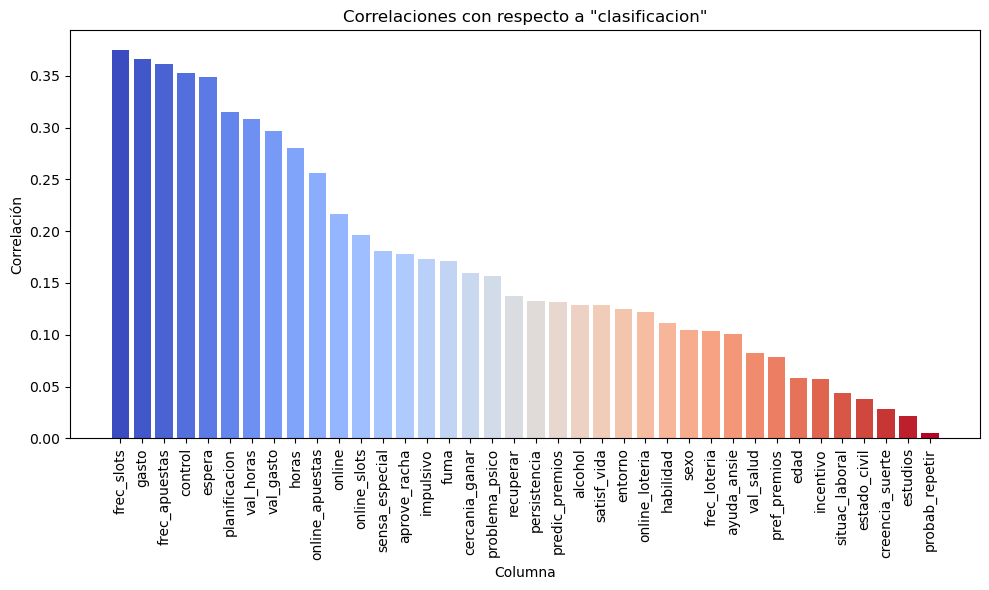

In [33]:
correlaciones = df.corr()['clasificacion']
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)
correlaciones_ordenadas = correlaciones_ordenadas[correlaciones_ordenadas != 1]
columnas = correlaciones_ordenadas.index
correlaciones = correlaciones_ordenadas.values

colores = plt.cm.coolwarm(np.linspace(0, 1, len(columnas)))

plt.figure(figsize=(10, 6))
barras = plt.bar(range(len(columnas)), correlaciones, color=colores)
plt.xticks(range(len(columnas)), columnas, rotation=90)
plt.xlabel('Columna')
plt.ylabel('Correlación')
plt.title('Correlaciones con respecto a "clasificacion"')

plt.tight_layout()
plt.show()


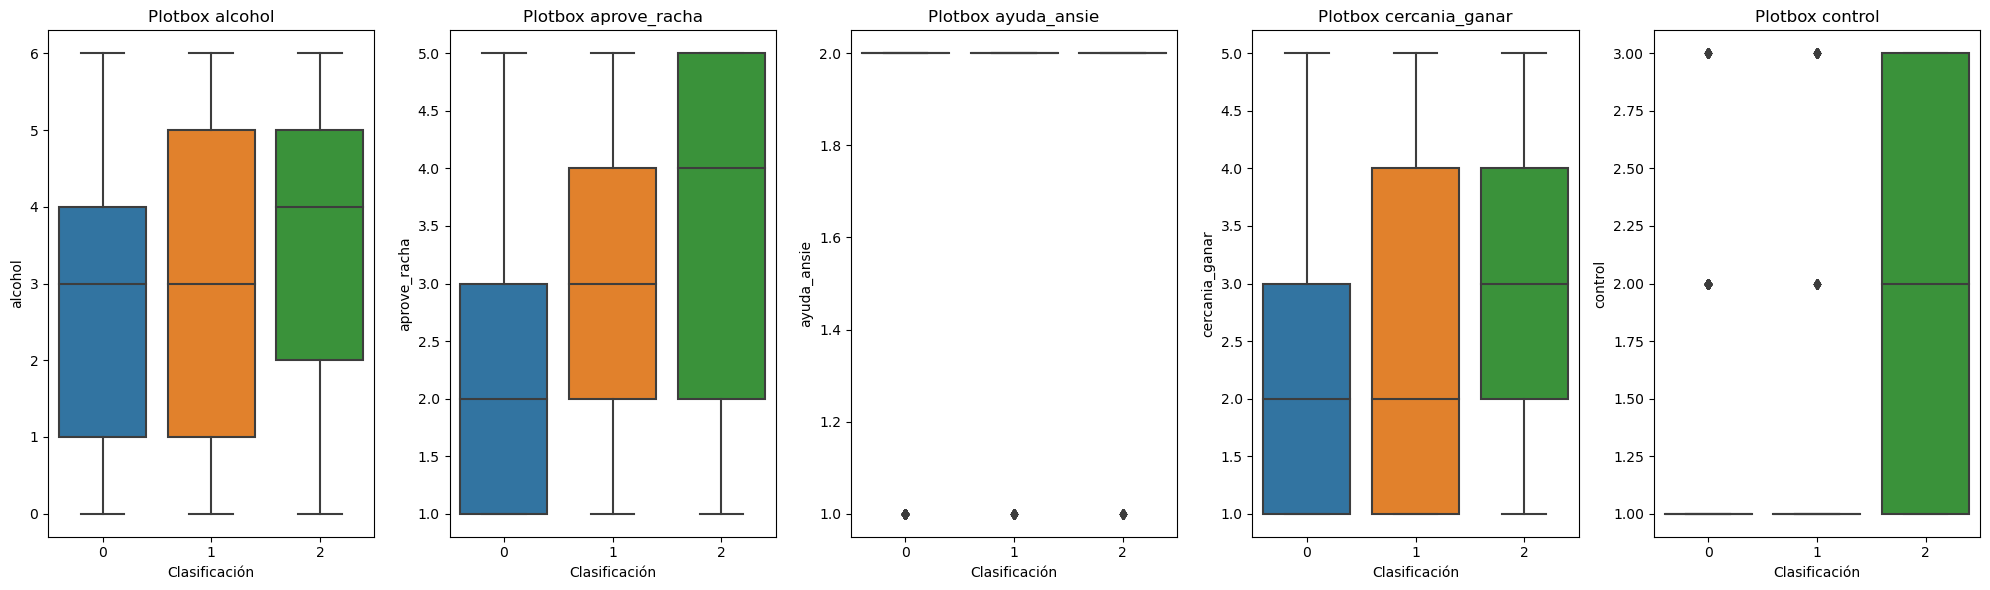

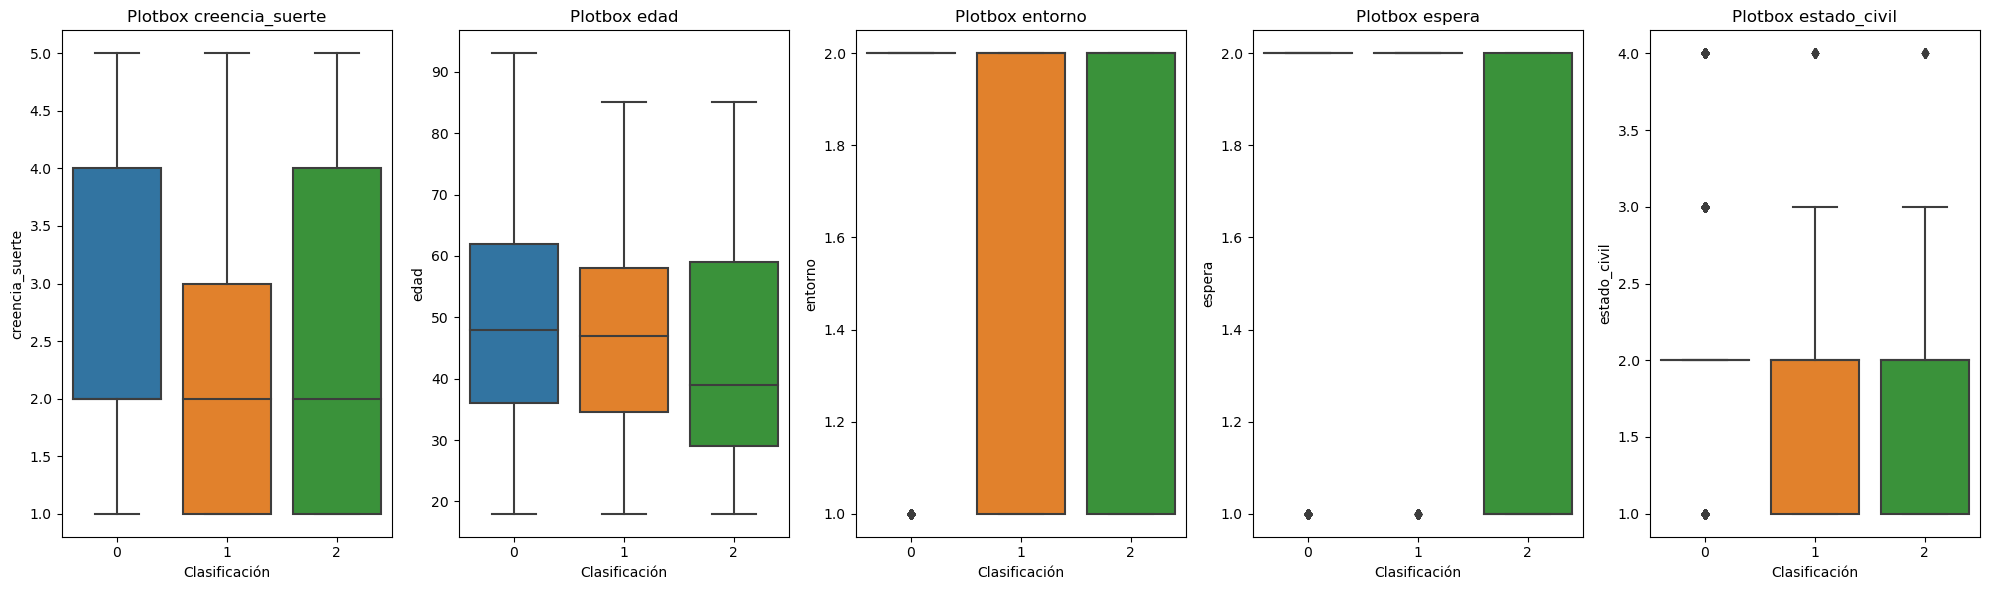

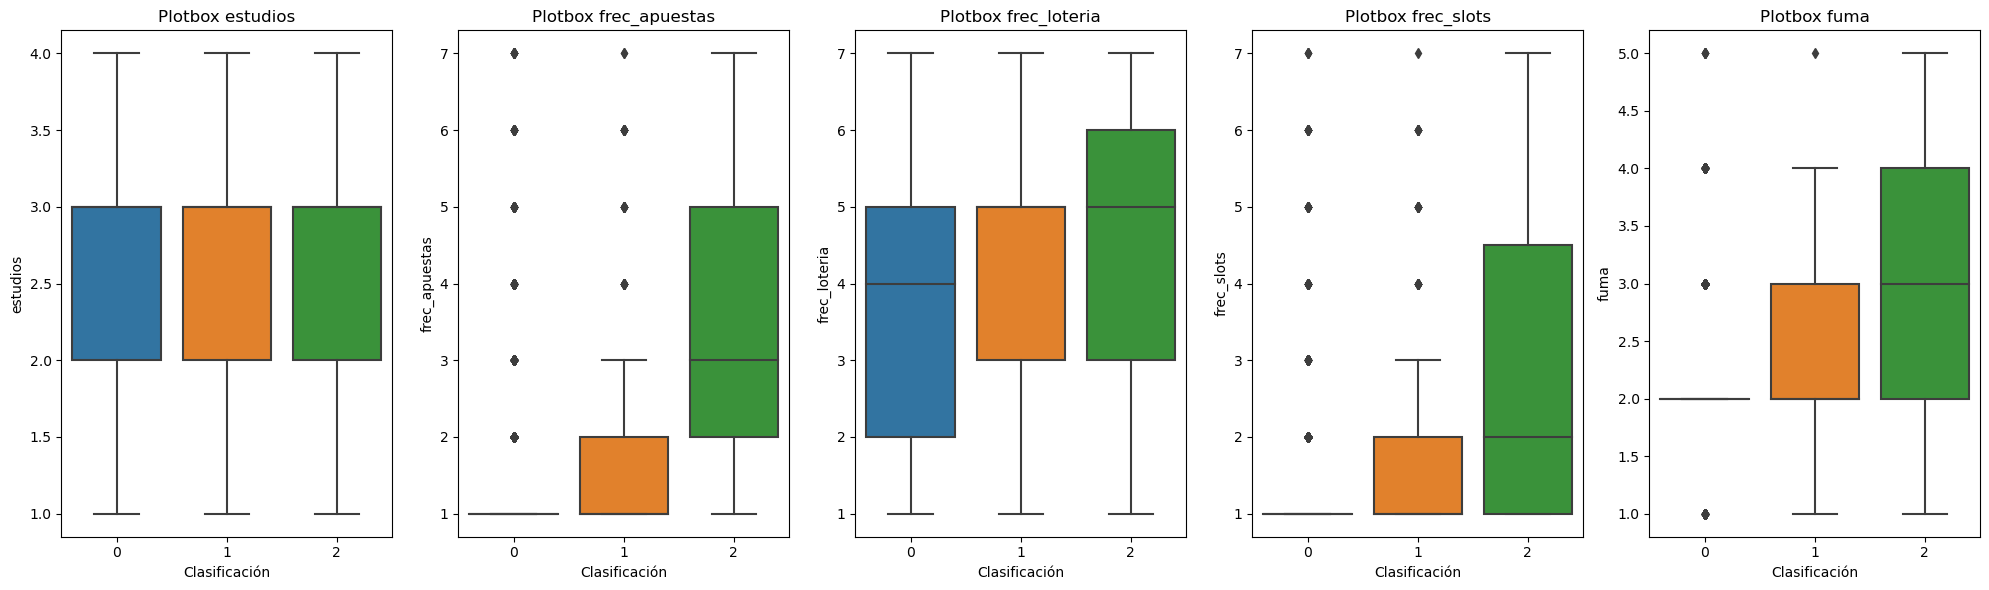

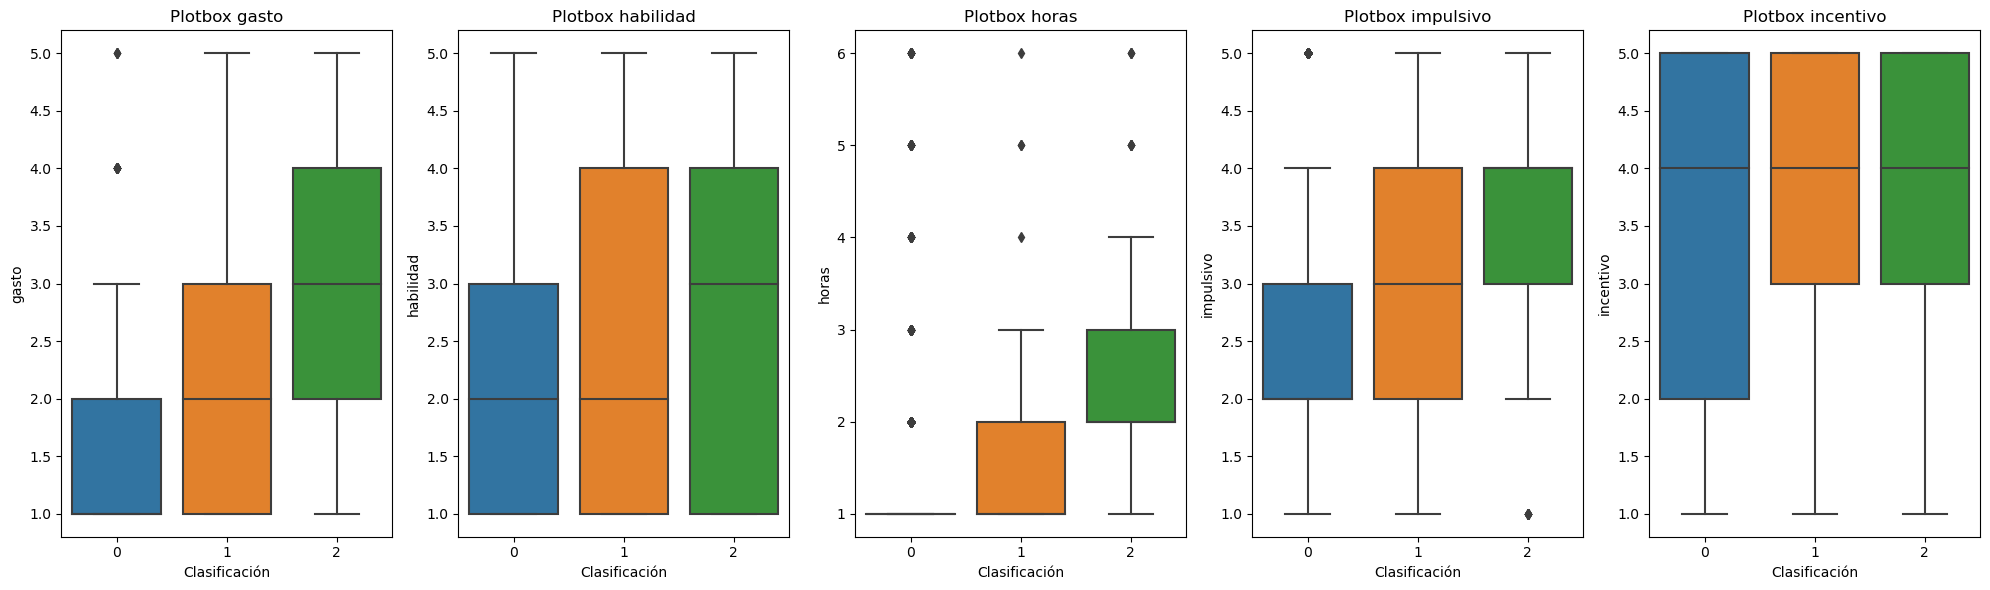

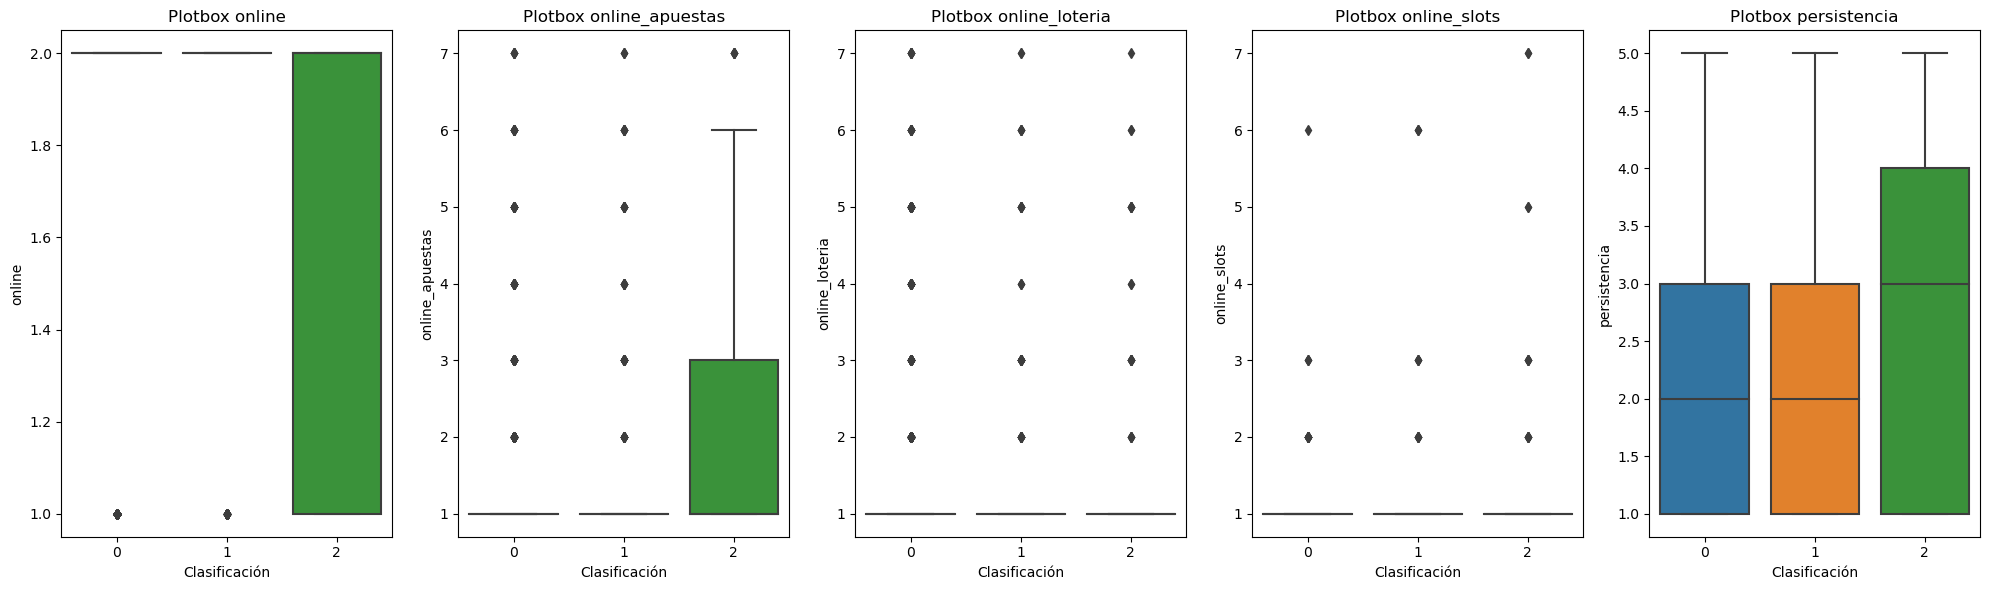

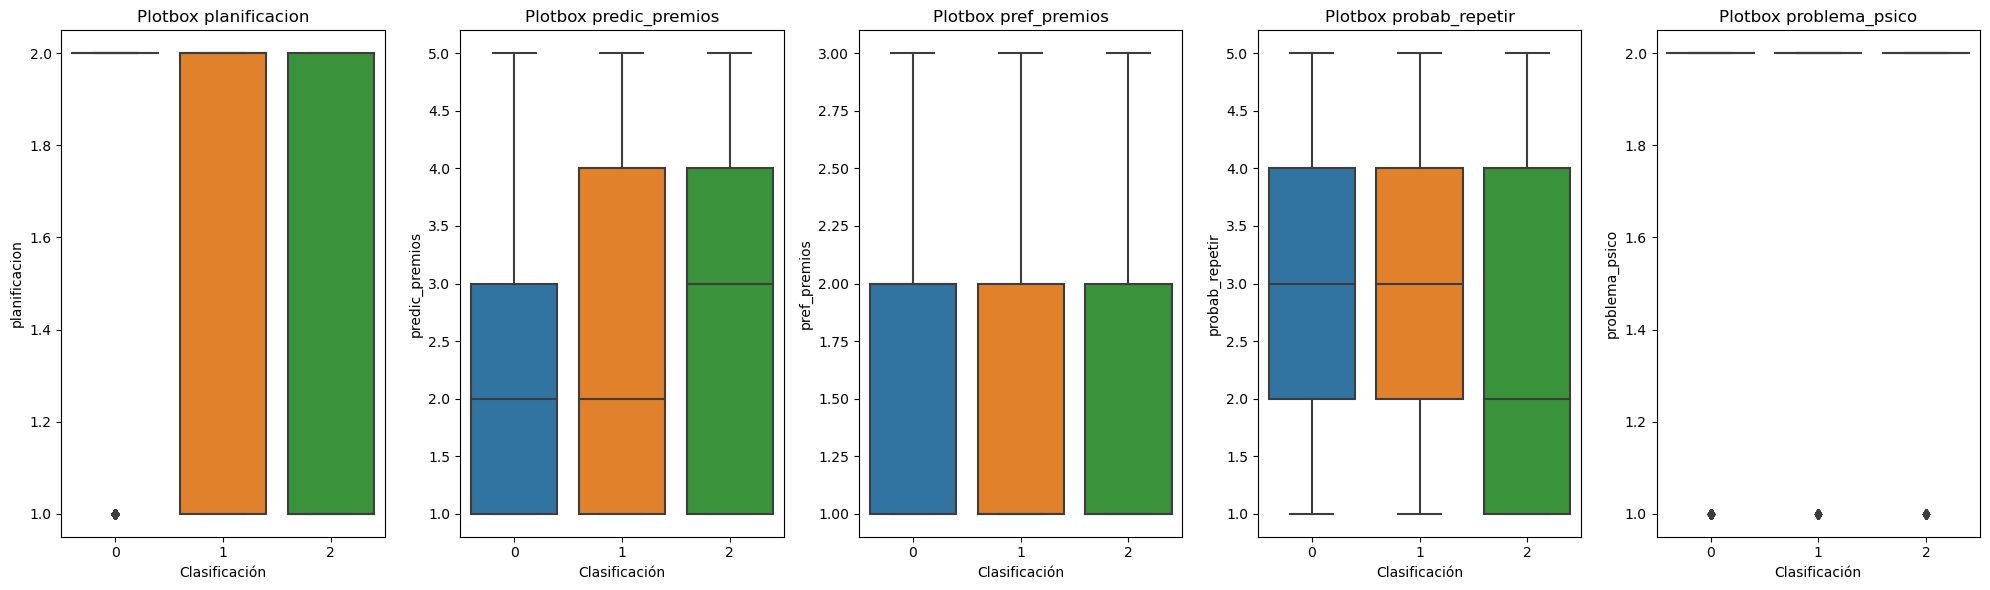

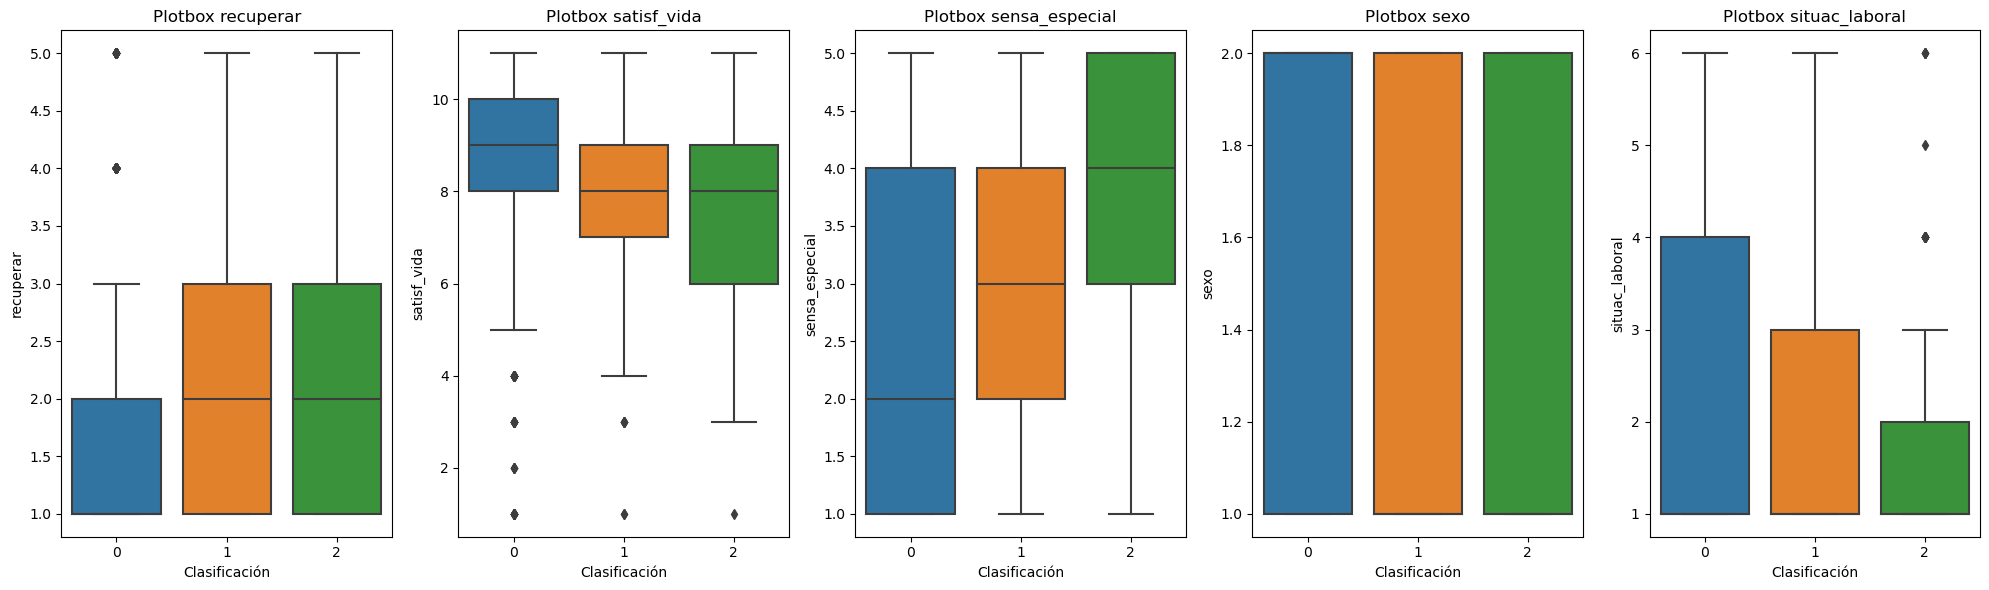

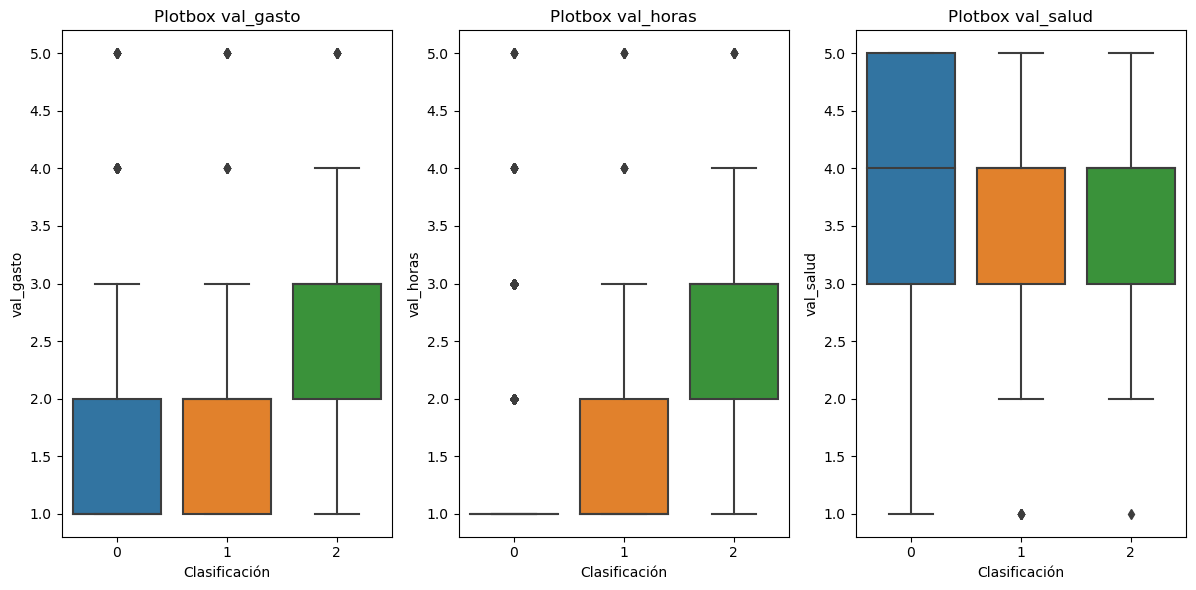

In [34]:
for i in range(8):
    columnas_linea = df.columns.difference(['clasificacion'])[i*5:(i+1)*5]
    plt.figure(figsize=(20, 6))
    
    for j, columna in enumerate(columnas_linea):
        plt.subplot(1, 5, j+1)
        sns.boxplot(x='clasificacion', y=columna, data=df)
        plt.title(f'Plotbox {columna}')
        plt.xlabel('Clasificación')
    
    plt.tight_layout()
    plt.show()


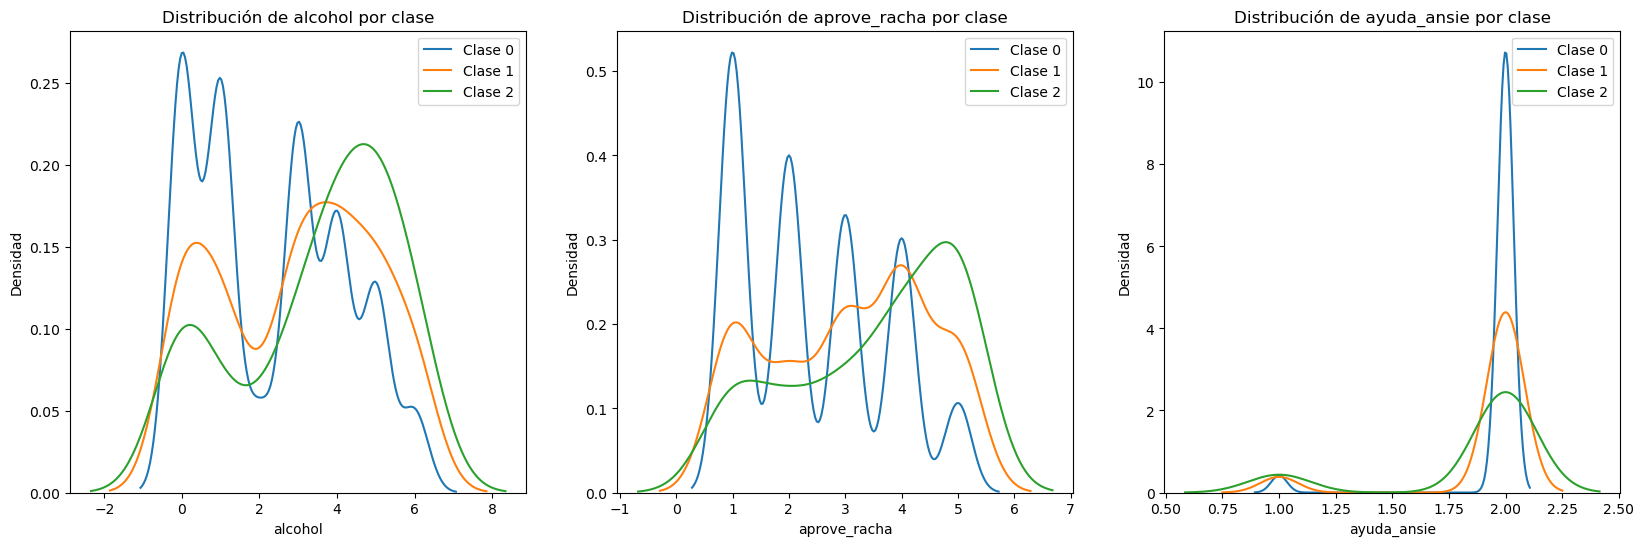

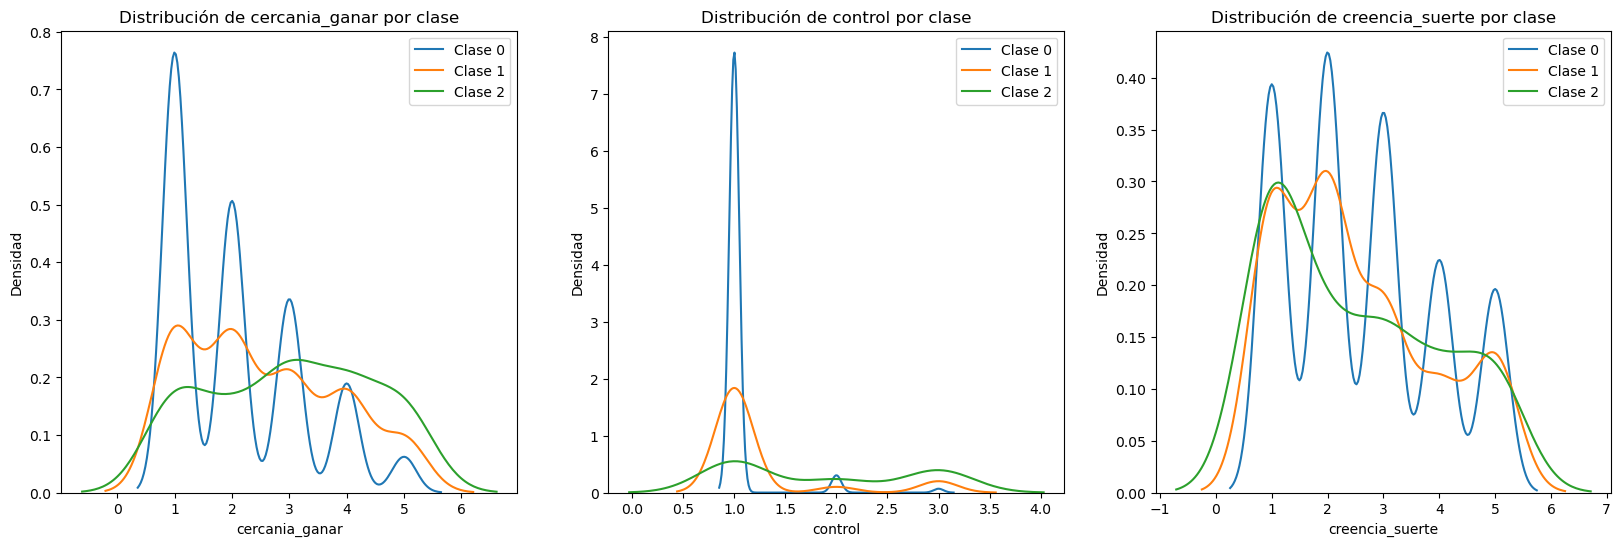

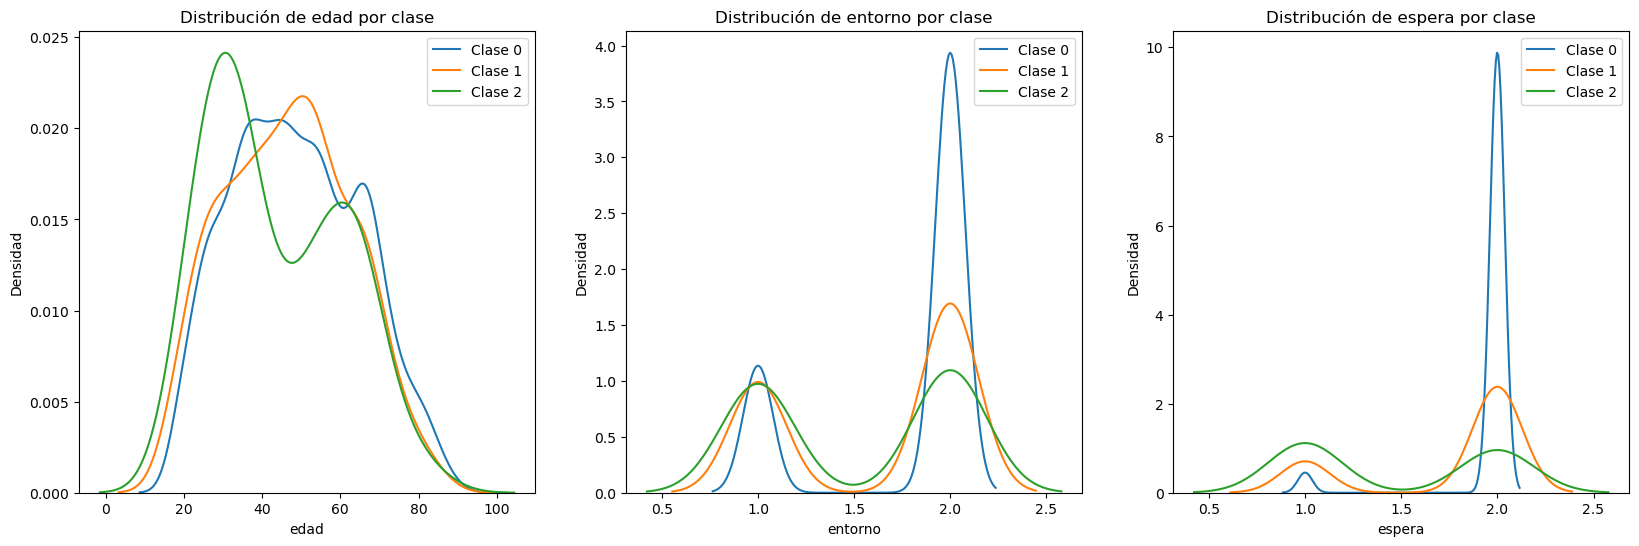

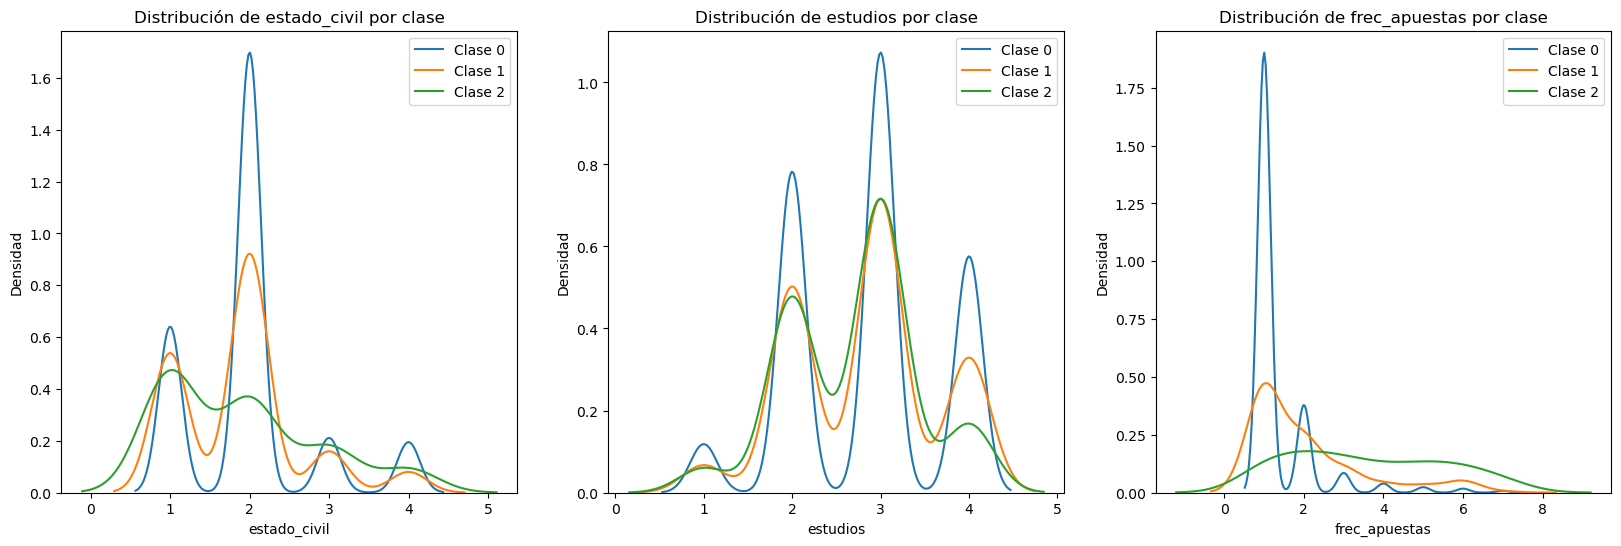

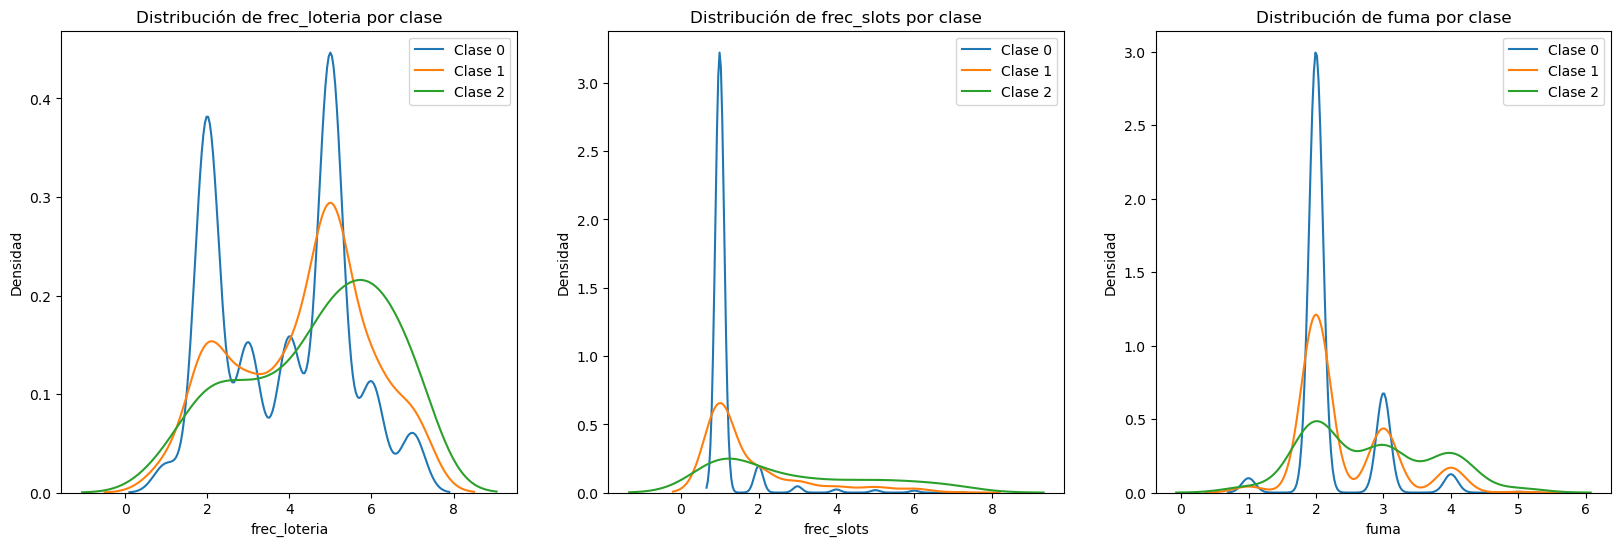

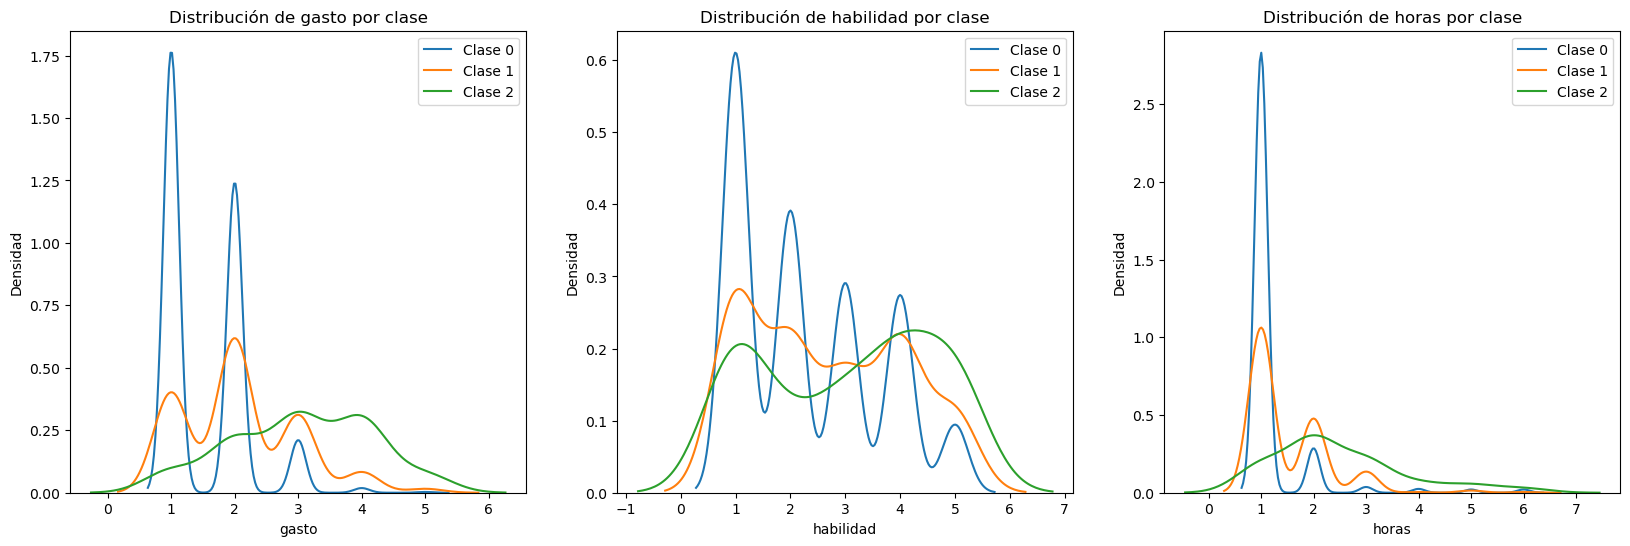

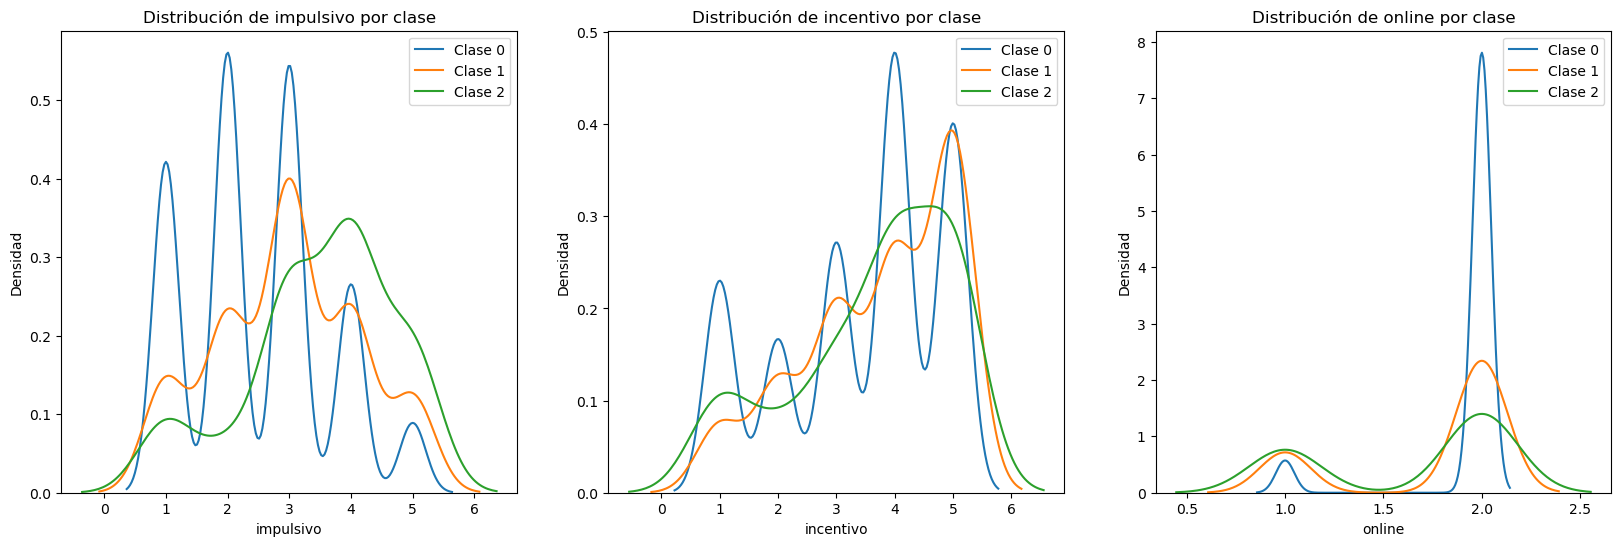

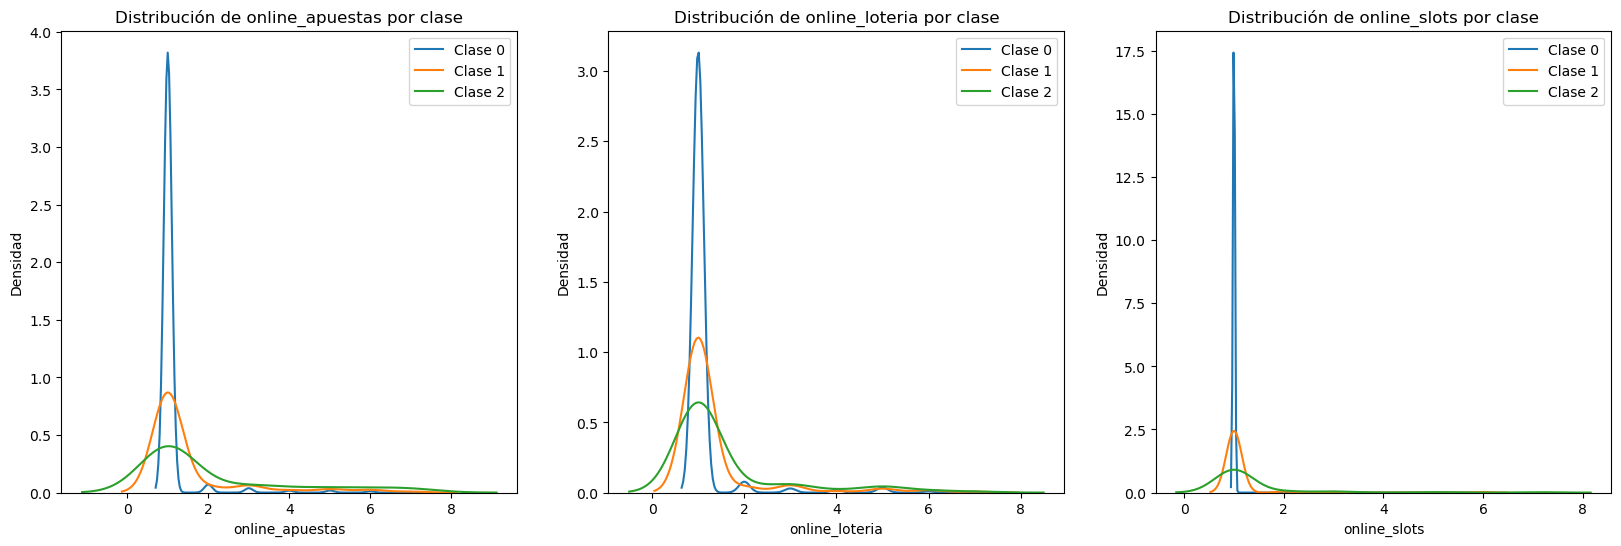

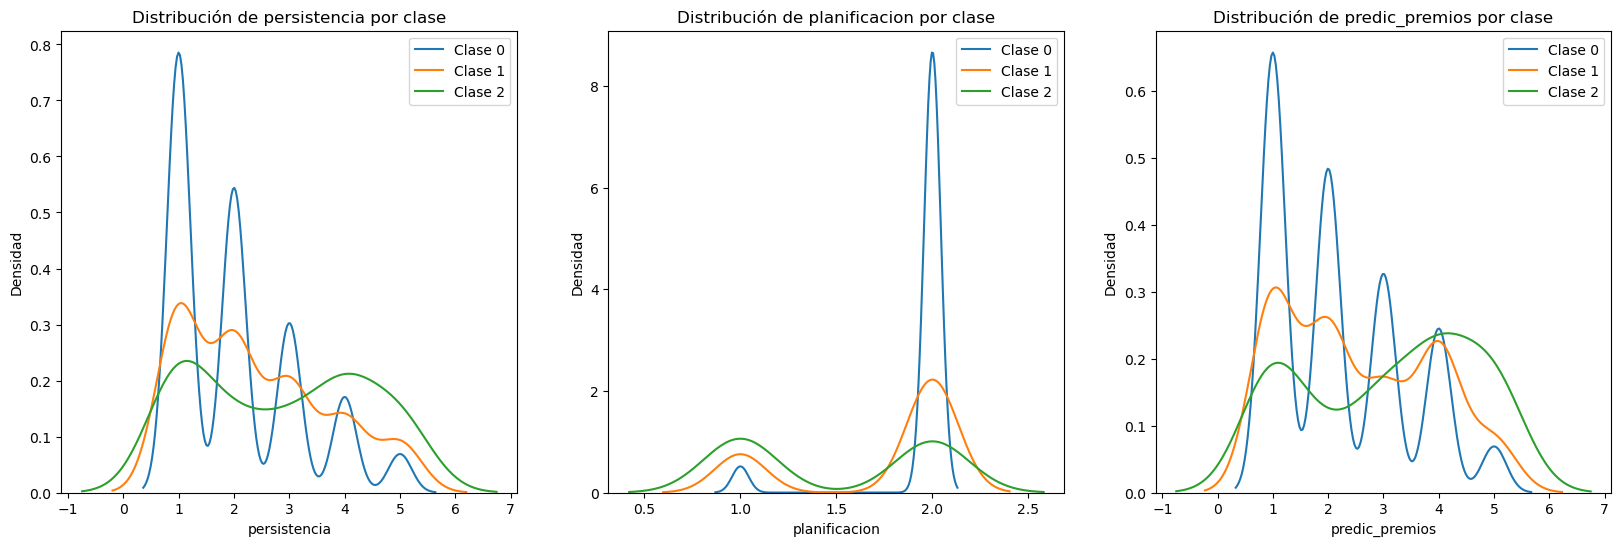

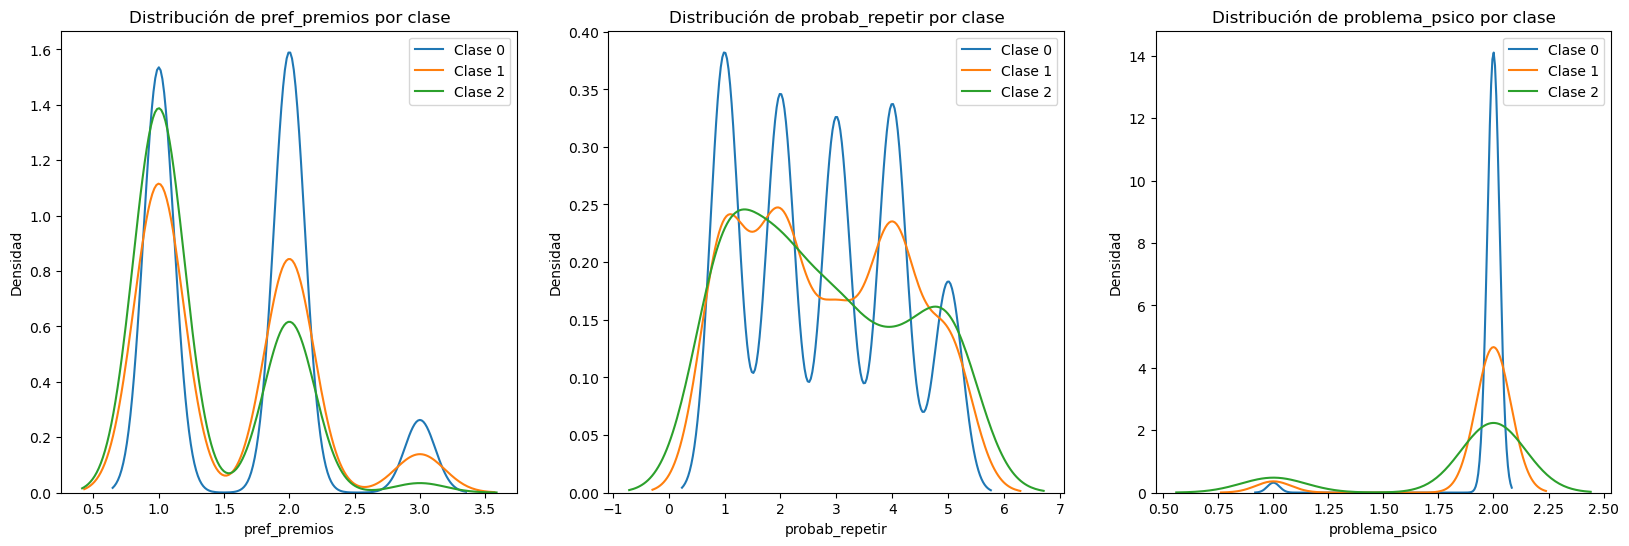

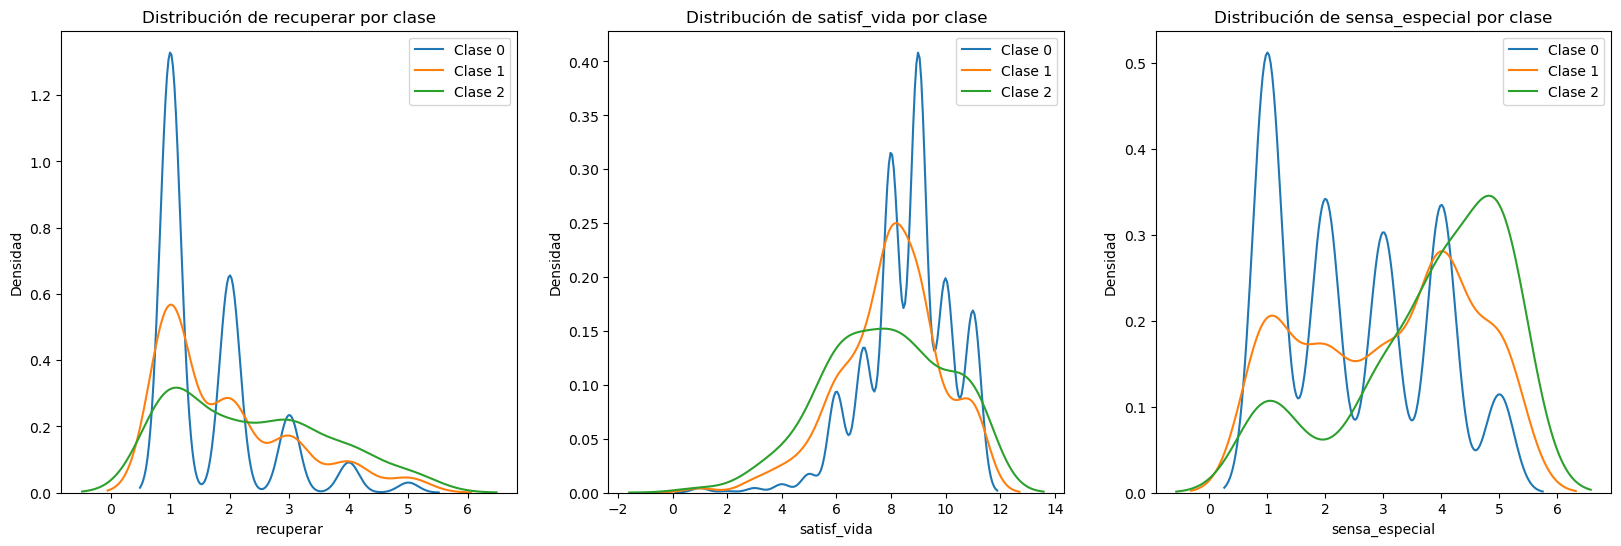

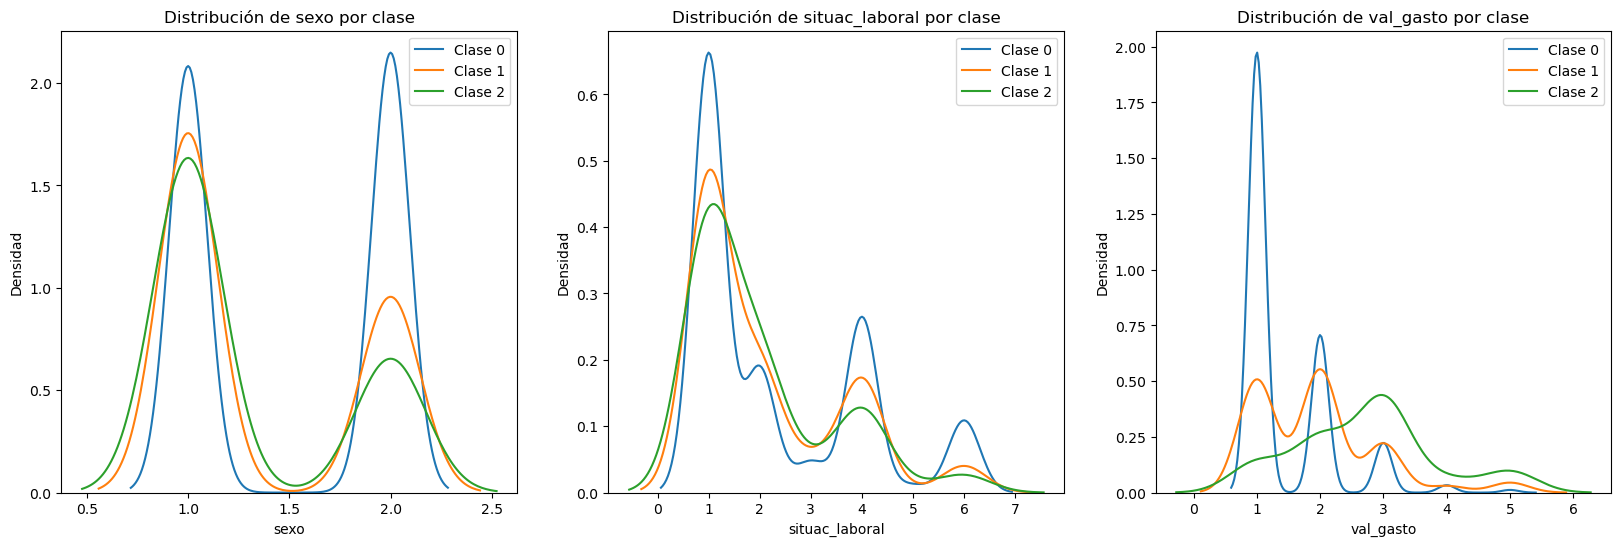

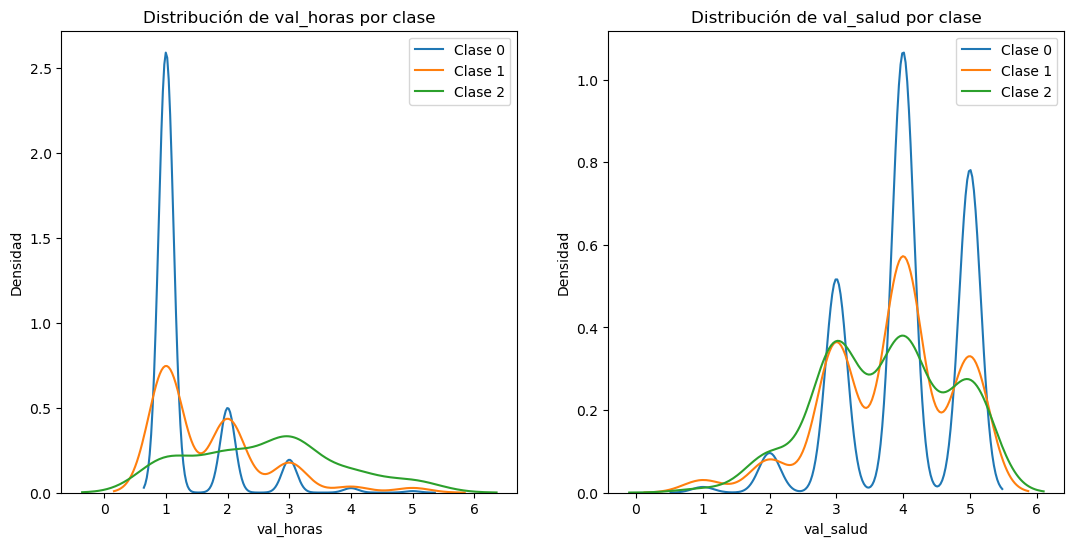

In [35]:
for i, columna in enumerate(df.columns.difference(['clasificacion'])):
    if i % 3 == 0:
        plt.figure(figsize=(20, 6))
        
    plt.subplot(1, 3, i % 3 + 1)
    
    for clasificacion in df['clasificacion'].unique():
        sns.kdeplot(df[df['clasificacion'] == clasificacion][columna], label=f'Clase {clasificacion}')
    
    plt.title(f'Distribución de {columna} por clase')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.legend()    

In [36]:
var_sin_outliers = []
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    if perc == 0:
        var_sin_outliers.append(k)

var_con_outliers = [columna for columna in df.columns if columna != 'clasificacion' and columna not in var_sin_outliers]

print("Variables con outliers:", var_con_outliers)
print("\nVariables sin outliers:", var_sin_outliers)

Variables con outliers: ['estado_civil', 'fuma', 'problema_psico', 'ayuda_ansie', 'impulsivo', 'satisf_vida', 'online', 'horas', 'val_horas', 'gasto', 'val_gasto', 'entorno', 'planificacion', 'control', 'espera', 'frec_slots', 'frec_apuestas', 'online_loteria', 'online_slots', 'online_apuestas', 'recuperar']

Variables sin outliers: ['edad', 'sexo', 'estudios', 'situac_laboral', 'val_salud', 'alcohol', 'pref_premios', 'frec_loteria', 'habilidad', 'probab_repetir', 'aprove_racha', 'persistencia', 'cercania_ganar', 'creencia_suerte', 'predic_premios', 'sensa_especial', 'incentivo']


In [37]:
from scipy import stats
from scipy.stats import shapiro

for data in df.columns:
    shapiro_test = stats.shapiro(df[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La muestra tiene probablemente una distribución normal.\n")
    else:
        print("La muestra \033[91mNO\033[0m tiene probablemente una distribució normal.\n")

La variable edad te un P-value de 5.382424580378515e-25
La muestra NO tiene probablemente una distribució normal.

La variable sexo te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable estudios te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable situac_laboral te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable estado_civil te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable val_salud te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable alcohol te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable fuma te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable problema_psico te un P-value de 0.0
La muestra NO tiene probablemente una distribució normal.

La variable ayuda_ansie te un P-value de 0.0
La muestra NO tiene prob

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

df_escala = pd.DataFrame()

minmax_scaler = MinMaxScaler()
df_escala[var_sin_outliers] = minmax_scaler.fit_transform(df[var_sin_outliers])

robust_scaler = RobustScaler()
df_escala[var_con_outliers] = robust_scaler.fit_transform(df[var_con_outliers])

df_escala

,edad,sexo,estudios,situac_laboral,val_salud,alcohol,pref_premios,frec_loteria,habilidad,probab_repetir,aprove_racha,persistencia,cercania_ganar,creencia_suerte,predic_premios,sensa_especial,incentivo,estado_civil,fuma,problema_psico,ayuda_ansie,impulsivo,satisf_vida,online,horas,val_horas,gasto,val_gasto,entorno,planificacion,control,espera,frec_slots,frec_apuestas,online_loteria,online_slots,online_apuestas,recuperar
0,0.186667,0.0,1.000000,0.2,0.75,0.166667,0.0,0.166667,0.50,0.50,0.50,0.50,0.50,0.25,0.75,0.25,0.50,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.453333,0.0,0.666667,0.6,0.50,0.666667,1.0,0.666667,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.50,-1.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.653333,1.0,0.333333,0.6,0.75,0.166667,1.0,0.166667,0.50,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.75,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.560000,1.0,0.666667,0.0,1.00,0.166667,0.0,0.666667,0.50,0.75,0.50,0.50,0.50,0.75,0.50,0.25,0.75,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.440000,1.0,0.666667,0.0,0.75,0.333333,0.0,0.500000,0.00,0.00,0.25,0.50,0.50,0.25,0.00,0.00,0.25,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,0.386667,1.0,0.666667,0.0,0.75,0.333333,0.5,0.333333,0.25,0.50,0.75,0.50,0.25,0.50,0.25,0.75,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4665,0.200000,1.0,0.666667,0.0,0.50,0.000000,0.5,0.666667,0.00,0.25,0.75,0.75,0.50,0.75,0.00,0.75,0.50,-1.0,0.0,-1.0,-1.0,-2.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4666,0.280000,1.0,0.333333,1.0,1.00,0.000000,0.5,0.166667,0.25,0.00,0.50,0.50,0.75,0.50,0.00,0.25,0.75,0.0,2.0,0.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4667,0.520000,0.0,0.666667,0.0,0.75,0.833333,0.5,0.666667,0.00,0.50,0.75,0.50,0.25,0.25,0.00,0.75,0.50,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [39]:
from sklearn.model_selection import train_test_split

X = df_escala
y = df['clasificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

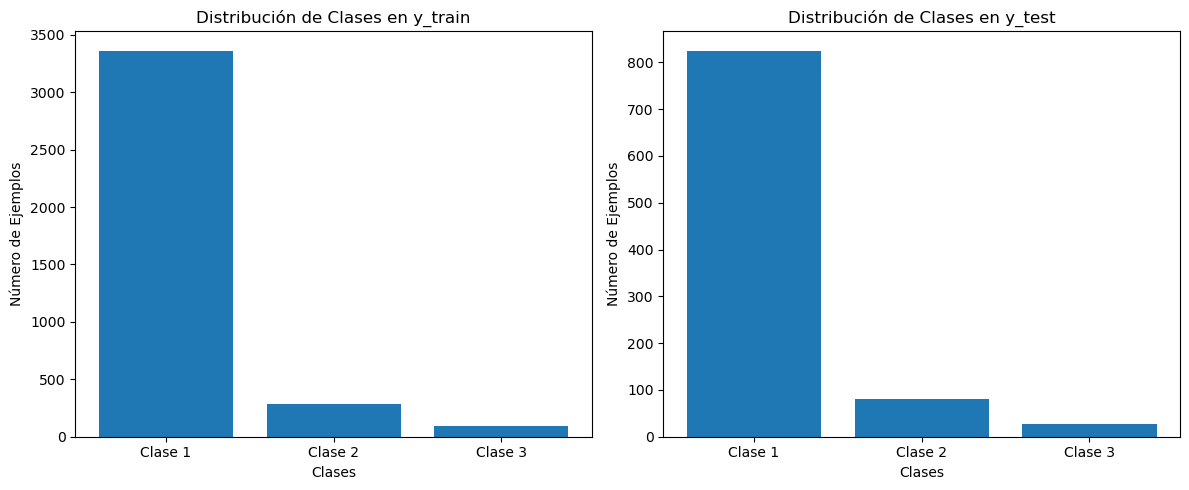

In [40]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
class_labels = ['Clase 1', 'Clase 2', 'Clase 3']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(class_labels, counts_train)
plt.title('Distribución de Clases en y_train')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.subplot(122)
plt.bar(class_labels, counts_test)
plt.title('Distribución de Clases en y_test')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.tight_layout()
plt.show()

Model: KNN
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       825
           1       0.36      0.06      0.11        81
           2       1.00      0.11      0.19        28

    accuracy                           0.89       934
   macro avg       0.75      0.39      0.41       934
weighted avg       0.85      0.89      0.85       934



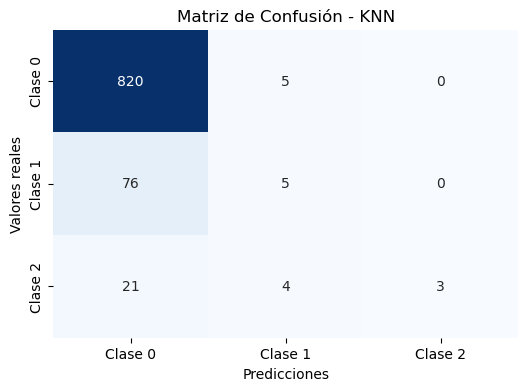

Model: XGBoost
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       825
           1       0.39      0.16      0.23        81
           2       0.90      0.32      0.47        28

    accuracy                           0.89       934
   macro avg       0.74      0.49      0.55       934
weighted avg       0.87      0.89      0.87       934



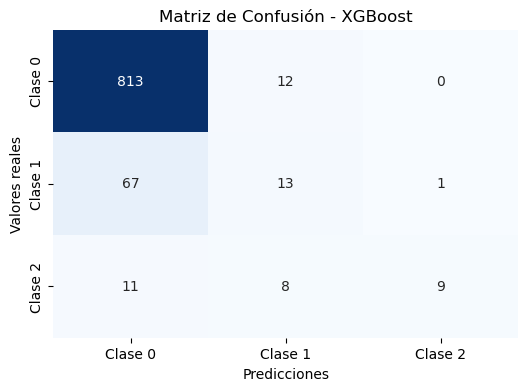

Model: SVC
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       825
           1       0.50      0.02      0.05        81
           2       0.88      0.25      0.39        28

    accuracy                           0.89       934
   macro avg       0.76      0.42      0.46       934
weighted avg       0.86      0.89      0.85       934



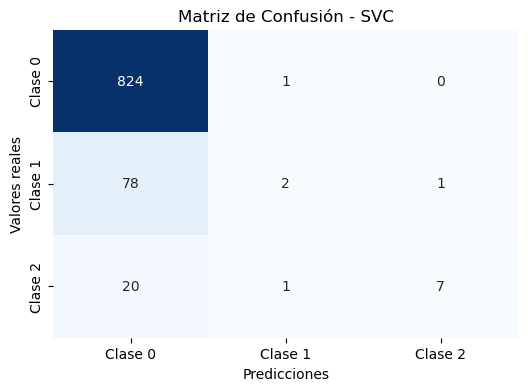

Model: Random Forest
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       825
           1       0.25      0.04      0.06        81
           2       1.00      0.21      0.35        28

    accuracy                           0.89       934
   macro avg       0.72      0.42      0.45       934
weighted avg       0.84      0.89      0.85       934



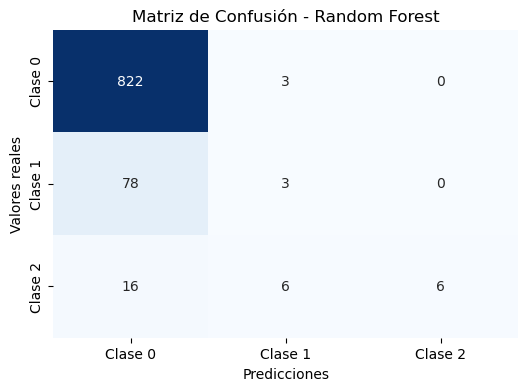

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier()
svc = SVC()
random_forest = RandomForestClassifier()

models = {'KNN': knn, 
          'XGBoost': xgb_model, 
          'SVC': svc,
          'Random Forest': random_forest}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("\033[1mModel: {}\033[0m".format(name))
    print(report)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

Model: SVC
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       825
           1       0.14      0.35      0.20        81
           2       0.59      0.36      0.44        28

    accuracy                           0.74       934
   macro avg       0.55      0.50      0.50       934
weighted avg       0.84      0.74      0.78       934



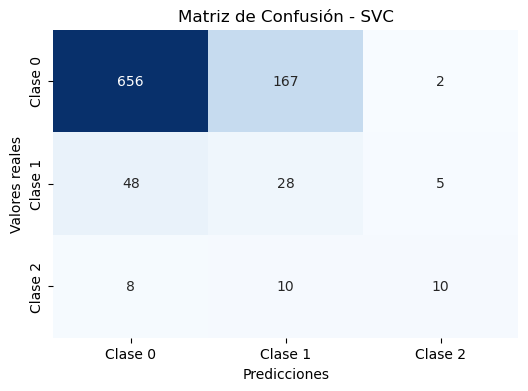

In [42]:
class_weights = {0: 1, 1: 100, 2: 300}

clf = SVC(class_weight=class_weights, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\033[1mModel: SVC\033[0m")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title(f'Matriz de Confusión - SVC')
plt.show()


In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

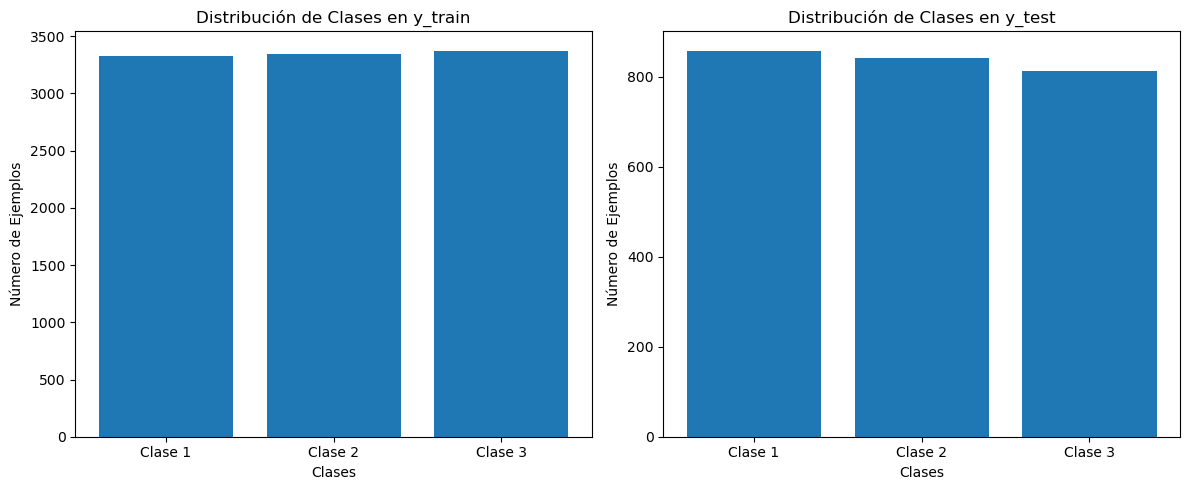

In [44]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)
class_labels = ['Clase 1', 'Clase 2', 'Clase 3']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(class_labels, counts_train)
plt.title('Distribución de Clases en y_train')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.subplot(122)
plt.bar(class_labels, counts_test)
plt.title('Distribución de Clases en y_test')
plt.xlabel('Clases')
plt.ylabel('Número de Ejemplos')

plt.tight_layout()
plt.show()

Model: KNN
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       858
           1       0.81      1.00      0.90       842
           2       0.97      1.00      0.98       813

    accuracy                           0.91      2513
   macro avg       0.93      0.92      0.91      2513
weighted avg       0.93      0.91      0.91      2513



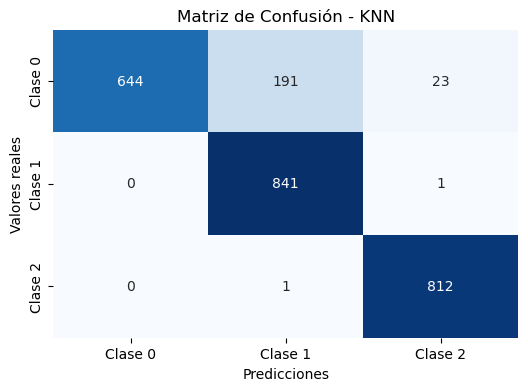

Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       858
           1       1.00      0.93      0.97       842
           2       0.99      1.00      1.00       813

    accuracy                           0.97      2513
   macro avg       0.98      0.97      0.97      2513
weighted avg       0.98      0.97      0.97      2513



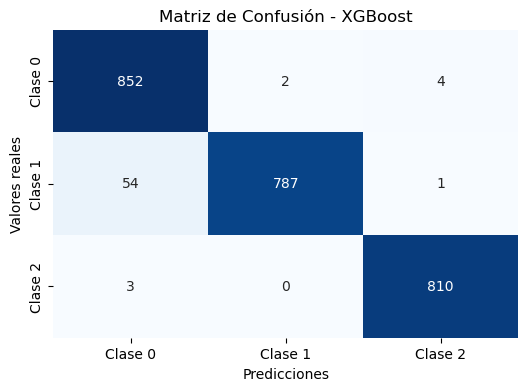

Model: SVC
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       858
           1       0.84      0.83      0.83       842
           2       0.98      0.99      0.99       813

    accuracy                           0.88      2513
   macro avg       0.88      0.88      0.88      2513
weighted avg       0.88      0.88      0.88      2513



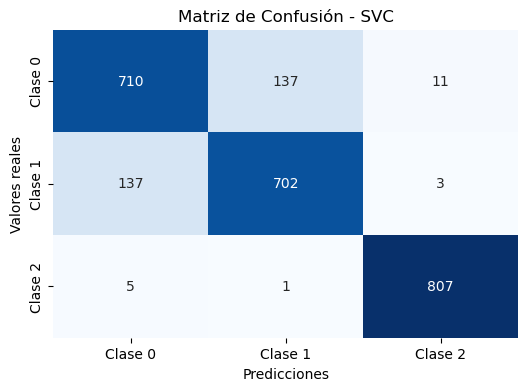

Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       858
           1       0.99      0.95      0.97       842
           2       0.99      1.00      0.99       813

    accuracy                           0.98      2513
   macro avg       0.98      0.98      0.98      2513
weighted avg       0.98      0.98      0.98      2513



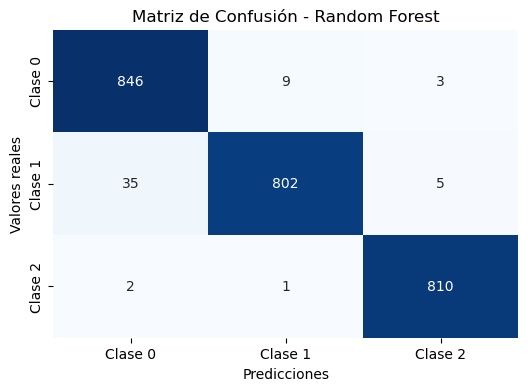

In [45]:
knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier()
svc = SVC()
random_forest = RandomForestClassifier()


models = {'KNN': knn, 
          'XGBoost': xgb_model, 
          'SVC': svc,
          'Random Forest': random_forest}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    
    report = classification_report(y_test, y_pred)
    
    print("\033[1mModel: {}\033[0m".format(name))
    print(report)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_estimator = rf_grid_search.best_estimator_

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_classifier = xgb.XGBClassifier()

xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

xgb_best_params = xgb_grid_search.best_params_
xgb_best_estimator = xgb_grid_search.best_estimator_

print("Mejores parámetros para Random Forest:", rf_best_params)
print("Mejores parámetros para XGBoost:", xgb_best_params)


Mejores parámetros para Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejores parámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       858
           1       0.99      0.95      0.97       842
           2       0.99      1.00      0.99       813

    accuracy                           0.98      2513
   macro avg       0.98      0.98      0.98      2513
weighted avg       0.98      0.98      0.98      2513



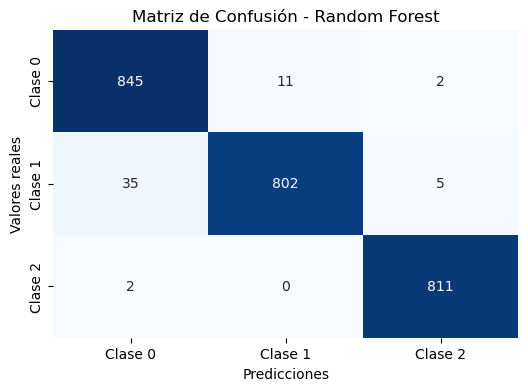

Modelo: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       858
           1       0.99      0.94      0.97       842
           2       1.00      1.00      1.00       813

    accuracy                           0.97      2513
   macro avg       0.98      0.97      0.97      2513
weighted avg       0.98      0.97      0.97      2513



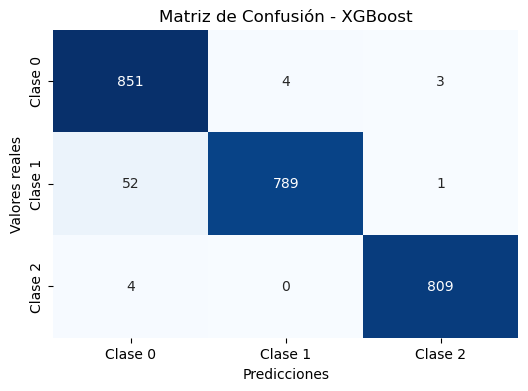

In [47]:
rf_best_model = RandomForestClassifier(**rf_best_params)
xgb_best_model = xgb.XGBClassifier(**xgb_best_params)

rf_best_model.fit(X_train, y_train)
xgb_best_model.fit(X_train, y_train)

for name, model in [('Random Forest', rf_best_model), ('XGBoost', xgb_best_model)]:
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("\033[1mModelo: {}\033[0m".format(name))
    print(report)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
                yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión - {}'.format(name))
    plt.show()


In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

rf_best_model = RandomForestClassifier(**rf_best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(rf_best_model, X, y, cv=kf)

report_cv = classification_report(y, y_pred_cv, output_dict=True)
report_cv_mean = {key: value for key, value in report_cv.items() if isinstance(value, dict)}
for key, value in report_cv_mean.items():
    report_cv_mean[key] = {inner_key: round(np.mean(inner_value),2) for inner_key, inner_value in value.items()}

print("\033[1mClassification Report Promedio:\033[0m")
for key, value in report_cv_mean.items():
    print(key, value)


Classification Report Promedio:
0 {'precision': 0.91, 'recall': 1.0, 'f1-score': 0.95, 'support': 4187.0}
1 {'precision': 0.47, 'recall': 0.05, 'f1-score': 0.09, 'support': 363.0}
2 {'precision': 0.7, 'recall': 0.33, 'f1-score': 0.45, 'support': 119.0}
macro avg {'precision': 0.69, 'recall': 0.46, 'f1-score': 0.49, 'support': 4669.0}
weighted avg {'precision': 0.87, 'recall': 0.91, 'f1-score': 0.87, 'support': 4669.0}
